# Introduction:
 In this competition, I confronted three main objectives that influenced both the design and the methodology. A holistic approach was adopted, incorporating meticulous pre-processing, advanced feature engineering, and a distinct modeling strategy to suit the outlined objectives.

## Objectives:

**Objective A: Estimating Energy Consumption in Specific Base Station Products:** For this objective, it's understood that specific base information, their configurations, and a historical usage, typically spanning a complete week, were received. In this scenario, the training data, and primarily the history of energy expenditure, were used to determine the best forecasting patterns. It was found that treating this as a time-series problem yielded the best results. The model uses energy and load along with the seasonality of each base's use to pinpoint the most accurate energy estimates.

**Objective B: Generalization Across Different Base Station Products:** In this scenario, I understood that having a history of bases with similar configurations enables using that history to forecast a new base that uses similar configurations. Here, we face a different problem because the user usage history and its hourly seasonality become irrelevant, as does the energy history. It's still possible to treat it as a time-series problem by using lags and other such features. However, what showed the best result was the use of complex features concerning the new bases' configurations. This shows that there still exists a way to use historical data to forecast unknown futures and that they still have a certain strong correlation. The issue transforms into a hybrid problem, combining elements of time-series analysis and complex methods to identify patterns in new base configurations for precise energy prediction.

**ObjC - Generalization across different base station configurations:** In this scenario, it's understood that besides new databases, the model should also generalize to new base configurations, often with significant differences, making it practically impossible to use other bases' history for forecasting energy consumption. After several optimizations and tests, it was understood that there wasn't a possibility to create a complex model and that the history of data did not hold much relevance. Characteristics such as load, EMS Modes 1, 2, and 6 gained importance. It was noticed that the simpler the model, the better it performed and the more general it became. Therefore, all robust features and all time-series features were removed, generating greater generalization power and avoiding overfitting.

## Data Segmentation:

In our journey to develop models that catered to objectives A, B, and C, we recognized the need to segment our data specifically for each scenario. This segmentation ensured that each data set aligned with the specific goal at hand, making sure the dataset's features matched the model's requirements.

## Segmentation Technique:

To segment the test data, we examined two main features: BS_cat (which represents station data) and RUType_cat (which denotes the types of configurations and products used). We established unique sets of these features from the training data and based on them, crafted masks to segment the test data.
    # (Minimal example)
    # w1 mask for Objective A
    mask_w1 = X_test['BS_cat'].isin(bs_train_unique) & X_test['RUType_cat'].isin(rUType_train_unique)

    # w5 mask for Objective B
    mask_w5 = (~X_test['BS_cat'].isin(bs_train_unique)) & X_test['RUType_cat'].isin(rUType_train_unique)

    # w10 mask for Objective C
    mask_w10 = (~X_test['BS_cat'].isin(bs_train_unique)) & ~X_test['RUType_cat'].isin(rUType_train_unique)

## Subsampling
A crucial step was the implementation of subsampling through Adversarial Validation, with a special focus on Objectives B and C; Objective A already had a distribution very similar to the test data. The central idea was to adjust the training data distribution to more closely align with what is observed in the test data for these specific objectives.

W5 subsampling - Objective B
> ![](https://drive.google.com/uc?export=view&id=1TGjEERTl4jdwTdaEHRj35Ai7NsdK2dtW)



W10 subsampling - Objective C
> ![](https://drive.google.com/uc?export=view&id=1fB6IcTZa6J_ucX6Vg6B1a-8Pk_Ldb63-)

## Modeling Workflow:

With the data segmented, the modeling approach for each objective became more structured:
#### Common Steps for All Models:
1. **Data Cleaning**: Ensuring the quality of the data and merge all the data into a single table.
1. **Feature Engineering**: Creating new features based on existing ones to provide more insights or transforming features to better suit the modeling techniques.
1. **Modeling**: Using an ensemble approach that combines Ridge Regression with XGBoost.
1. **Training and Validation:** Employed MultiLabelStratifiedKFold with 10 folds for robust and balanced validation.

#### Specific Workflows:
1. ObjA (w1):
>* Preprocessing (Feature Selection)
>* Prediction for w1 data test
1. ObjB (w5):
>* Preprocessing (Feature Selection, Subsampling)
>* Prediction for w5 data test
1. ObjC (w10):
>* Preprocessing(Feature Selection, Subsampling)
>* Prediction for w10 data test

![](https://drive.google.com/uc?export=view&id=1qFGGuRm_XhuiwhAgFngKXZ-vC2UZy3jv)

By following these dedicated workflows for each objective, we aim to create models that are both accurate and adaptable, addressing the unique challenges of each data segment.

## Modeling Strategy - Ensemble Model:

The core of our solution lies in the ensemble model that merges Ridge Regression with XGBoost. Here's how it operates:
1. **Ridge Regression**: This acts as our foundational model, skilled at capturing linear trends within the data. Depending on the mask or objective, it's trained on different datasets tailored to each specific scenario.
1. **XGBoost on Residuals**: After obtaining predictions from Ridge, we compute the residuals (the difference between predictions and actual values) and train XGBoost on these residuals. This enables XGBoost to grasp non-linear nuances and tendencies.

![](https://drive.google.com/uc?export=view&id=1ezEkXZR94gXS_HFesyKQIdO4Dk_MQDki)

## Prediction Phase:
In the prediction stage, we initiate with predictions from Ridge Regression and subsequently adjust those predictions with those made by XGBoost on the residuals. The sum of these predictions renders our final estimate.

## About Data Leakage

The main approach used to ensure a top-10 placement was to initially accept the data leakage, and then validate with a code that had no data leakage at all. This was done because it was clear that the top-ranked participants had scores far lower than what would be possible without data leakage. Therefore, I chose this approach to genuinely track my progress and understand my standing in the competition.

My final submission was completely free of data leakage. This notebook can execute the three main models created for the competition:

1. Data Leakage + Subsampling
>* LB public = 0.050252038
>* LB private = 0.050298939
1. No Data Leakage + using Subsampling (final submission 1)
>* LB public = 0.069020300
>* LB private = 0.069932182
1. No Data Leakage + without Subsampling (final submission 2)
>* LB public = 0.104512931
>* LB private = 0.105793493

I would like to emphasize that in the feature engineering section, I discuss how data leakage is done. In this dataset, from what I have identified, there are three main ways to leak data:
1. Directly and willingly visualizing future data (Lead features, BFIL null values, etc...)
>* The only way to prevent data contamination is by not using these methods.
1. Viewing all data at once, thereby including future data, for example through aggregation methods like target encoding.
>* It's possible to avoid contaminating the data by only filling the aggregation with past data, without using future data. There is a specific method for this.
1. Finding patterns that are clearly data leaks, such as quirks in the data that lead to outcomes, but which will not be available in the real data.
>* Usually generated by errors in data creation, separation, or normalization.


# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install numpy==1.24.3
# !pip install pandas==2.0.3
# !pip install scikit-learn==1.2.2
# !pip install matplotlib==3.7.2
!pip install xgboost==1.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [3]:
# Built-in libraries
import os
import sys
import time
import pickle
import random

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from tabulate import tabulate

# Sklearn general utilities and classes
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, mean_absolute_error

# Sklearn models and clustering
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Additional libraries
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold


# Data Cleaning



Firstly, we merge all the data into a single table, which is Step 1. This consolidation simplifies data analysis and treatment. Our investigations have revealed that two key operations are required to optimize the data structure:
1. **Time-Series Sorting:** The data needs to be ordered in a time-series format. Proper sorting is crucial for any subsequent time-series analysis, as it allows for a coherent flow of data points over time.
1. **Aggregation with Optimization:** We noticed that columns containing more than one 'cell' were duplicated, necessitating an aggregation operation. This aggregation is not trivial as it involves multiple numerical and categorical columns, requiring an optimization process.
>* **Numerical Columns:** These include 'Energy,' 'w,' 'load,' 'ESMode1' to 'ESMode6,' 'Frequency,' 'Bandwidth,' 'Antennas,' and 'TXpower.'
>>* Standard Method: sum.
>>* Special Method: mean for specific columns.
>>* Objective: Most of the numerical columns are aggregated using the sum. However, columns like 'Energy,' 'w,' 'Frequency,' and 'Antennas' are specially treated and aggregated by the mean, as determined by optimization tests.
>* **Categorical Columns:** These are 'CellName,' 'RUType,' and 'Mode.'
>>* Method: The lambda function lambda x: ','.join(set(x)) if len(set(x)) > 1 else list(set(x))[0] was applied.
>>* Objective: This method aggregates unique values and joins them with a comma if there is more than one unique value in the category. If there's only one unique value, it is kept as is.


In the quest for an effective data aggregation model, various optimization tests were conducted to understand the impact of different approaches on the final outcome.

<table border="1">
    <thead>
        <tr>
            <th>Aggregation Strategy</th>
            <th>Result LB</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>All num using <code>sum</code>, except ['Energy', 'w', 'Frequency', 'Antennas'] using <code>mean</code> cat=None</td>
            <td>0.84</td>
        </tr>
        <tr>
            <td>All num using <code>sum</code>, except ['Energy', 'w'] using <code>mean</code> cat=None</td>
            <td>1.12</td>
        </tr>
        <tr>
            <td>All num using <code>sum</code>, except ['Energy', 'w', 'load'] using <code>mean</code> cat=None</td>
            <td>1.16</td>
        </tr>
        <tr>
            <td>All num using <code>sum</code>, except ['Energy', 'w', 'Frequency', 'Bandwidth', 'Antennas', 'TXpower'] using <code>mean</code> cat=None</td>
            <td>1.18</td>
        </tr>
        <tr>
            <td>Num standart and using categories as one-hot with <code>sum</code> aggregation</td>
            <td>0.88</td>
        </tr>
    </tbody>
</table>

We also observed the importance of consolidating the entire database to perform an ordering that favors time-series analyses. The use of '-1' for null values is strategic for separating training and testing sets, allowing for more efficient data manipulation in machine learning scenarios.

In [4]:
def merge_and_save_dataframes(file_path):
    """
    Consolidates various datasets related to energy consumption, power consumption,
    cell levels, and base station information into a single DataFrame.
    The resulting DataFrame is then saved as 'data_total.csv'.

    Parameters:
    -----------
    file_path : str
        The path to the directory where the input CSV files are stored.

    Returns:
    --------
    consolidated_dataframe : DataFrame
        The consolidated DataFrame, also saved as 'data_total.csv'.

    Inner Workings:
    ---------------
    1. Data Reading: Reads multiple CSV files to create individual DataFrames.
    2. Time Conversion: Converts the 'Time' column to datetime format.
    3. DataFrame Merging: Performs outer and left joins to consolidate data.
    4. Data Sorting: Sorts data by 'BS', 'Time', and 'CellName' columns.
    5. Data Saving: Saves the unified DataFrame as 'data_total.csv'.
    """

    # Creating individual DataFrames
    energy_consumption_df = pd.read_csv(f'{file_path}energy_consumption.csv')
    power_consumption_df = pd.read_csv(f'{file_path}power_consumption.csv')
    cell_level_df = pd.read_csv(f'{file_path}cell_level.csv')
    base_station_info_df = pd.read_csv(f'{file_path}base_station_inf.csv')

    # Converting 'Time' column to datetime format
    energy_consumption_df["Time"] = pd.to_datetime(energy_consumption_df["Time"])
    power_consumption_df["Time"] = pd.to_datetime(power_consumption_df["Time"])
    cell_level_df["Time"] = pd.to_datetime(cell_level_df["Time"])

    # Merging DataFrames on 'Time' and 'BS' columns
    temp_merge = pd.merge(energy_consumption_df, power_consumption_df,
                           on=["Time", "BS"], how="outer", suffixes=('_energy', '_power'))
    sorted_temp_merge = temp_merge.sort_values(by=["BS", "Time"])

    # Combining energy columns
    sorted_temp_merge["Energy"] = sorted_temp_merge["Energy_energy"].combine_first(sorted_temp_merge["Energy_power"])
    sorted_temp_merge.drop(columns=["Energy_energy", "Energy_power"], inplace=True)
    sorted_temp_merge = sorted_temp_merge[['Time', 'BS', 'Energy', 'w']]

    # Left join with cell_level_df
    temp_merge = pd.merge(sorted_temp_merge, cell_level_df, on=["Time", "BS"], how="left")
    sorted_temp_merge = temp_merge.sort_values(by=["BS", "Time"])

    # Left join with base_station_info_df
    consolidated_dataframe = pd.merge(sorted_temp_merge, base_station_info_df, on=["BS", "CellName"], how="left")
    sorted_consolidated_dataframe = consolidated_dataframe.sort_values(by=["BS", "Time", "CellName"])

    # Saving the consolidated DataFrame
    sorted_consolidated_dataframe.to_csv('data_total.csv', index=False)

    return sorted_consolidated_dataframe

In [5]:
def process_agg_dataframe(df_=None, agg_numeric_method='sum', agg_numeric_special_method=('mean', ['Energy', 'w', 'Frequency', 'Antennas']), cat_one_hot=None):
    """
    Aggregates and transforms a given DataFrame based on specified numerical and categorical methods.
    The resulting DataFrame is then saved as 'data_pivot_load.csv'.

    Parameters:
    -----------
    df_ : DataFrame, optional
        The DataFrame to be processed. If None, reads from 'data_total.csv'. Default is None.
    agg_numeric_method : str, optional
        The aggregation method for numerical columns. Default is 'sum'.
    agg_numeric_special_method : tuple, optional
        A tuple containing the special aggregation method and the columns it should be applied to.
        Default is ('mean', ['Energy', 'w', 'Frequency', 'Antennas']).
    cat_one_hot : str or None, optional
        Method for one-hot encoding categorical columns. If None, dont use one-hot encoding. Default is None.

    Returns:
    --------
    df_agg : DataFrame
        The aggregated DataFrame, also saved as 'data_pivot_load.csv'.

    Inner Workings:
    ---------------
    1. Data Loading: Reads 'data_total.csv' if no DataFrame is provided.
    2. Null Handling: Fills NA/NaN values with -1 for identification. (distinguish between train and test sets)
    3. Column Identification: Identifies numerical and categorical columns.
    4. Data Aggregation: Groups data by 'Time' and 'BS', applying specified aggregation methods.
    5. One-Hot Encoding: Optionally performs one-hot encoding for categorical columns.
    6. Data Sorting: Sorts the DataFrame by 'BS' and 'Time'.
    7. Data Saving: Saves the aggregated DataFrame as 'data_pivot_load.csv'.
    """
    # Load the DataFrame from the file data_total.csv
    if df_ is None:
        df = pd.read_csv("data_total.csv")
        df["Time"] = pd.to_datetime(df["Time"])
    else:
        df = df_.copy()

    # Replace NaN values with -1 to identify natural nulls in the data (distinguish between train and test sets)
    df.fillna(-1, inplace=True)

    # Define columns for grouping
    group_by_columns = ['Time', 'BS']

    # Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()[1:]

    print(f'numeric_columns {numeric_columns}')
    print(f'categorical_columns {categorical_columns}')

    # Create an aggregation dictionary
    aggregation_dict = {}

    for col in numeric_columns:
        aggregation_dict[col] = agg_numeric_method

    for col in agg_numeric_special_method[1]:
        aggregation_dict[col] = agg_numeric_special_method[0]

    # Handle optional one-hot encoding for categorical variables
    if cat_one_hot is not None:
        df_dummies = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=False)
        df = pd.concat([df, df_dummies], axis=1)
        for col in df.columns:
            if col not in group_by_columns + numeric_columns:
                aggregation_dict[col] = cat_one_hot
        for col in categorical_columns:
            if col not in group_by_columns:
                aggregation_dict[col] = lambda x: ','.join(set(x)) if len(set(x)) > 1 else list(set(x))[0]
    else:
        for col in categorical_columns:
            if col not in group_by_columns:
                aggregation_dict[col] = lambda x: ','.join(set(x)) if len(set(x)) > 1 else list(set(x))[0]

    # Perform the aggregation
    df_agg = df.groupby(group_by_columns).agg(aggregation_dict).reset_index()
    df_agg = df_agg.sort_values(['BS', 'Time'])

    # Save the processed DataFrame
    df_agg.reset_index(drop=True, inplace=True)
    df_agg.to_csv('data_pivot_load.csv', index=False)

    return df_agg

# Feature Engeniring

In this stage, which is one of the most important for ML, if not the most important, we try to create features that would improve the performance of the chosen ML algorithms and could also improve the results within the contexts of the competition objectives

1. **For Objective A** - Specifically for this objective, temporal features such as lags, differences, and specific columns that made sense for the objective were created, such as load, EMS, Hour, etc... A target encoding feature was also created on the hour parameter; this feature is extremely important as it captures the historical hourly seasonality of the base (BS). All temporal features are created specifically for each base, as this is the correct way to do it. (Grouping by BS)
> Example of usage:
>
> df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='load', num_lags=3, num_diff=2, data_leakage=data_leakage)

1. **For Objective B** - Specifically for this objective, robust polynomial features were created on columns such as 'load', 'ESMode6', 'Antennas', 'TXpower', 'Frequency', and k-means clustering for BS configurations. The main objective was to improve the algorithm's ability to generalize on new bases, using less historical BS data and more base configurations and load, maintaining a hybrid understanding of the problem between timeseries features and robust BS configurations.

1. **For Objective C** - No special features were created, although we tried, it didn't work, showing in all optimizations that simpler is better, making feature selection the most important step for it, as it removes all features that led to overfitting or could perform an analysis contaminated with historical BS or robust BS configurations.

**Transformations and parameters created for all contexts:**
1. **Date and Time Handling**: The function converts the 'Time' column to datetime format and extracts various features such as hour, day, month, and year.
1. **Label Encoding**: Several categorical columns are transformed into numerical ones through label encoding.
1. **Discretization**: Some continuous features are divided into 10 discrete intervals.
1. **One-Hot Encoding**: The 'RUType' column is one-hot encoded.

**Important parameters**:
> **data_leakage**: Controls whether you want to avoid data leakage. This mainly affects the way temporal features are created.

<table border="1">
  <tr>
    <th></th>
    <th>w1 MAE</th>
    <th>w5 MAE</th>
    <th>w10 MAE</th>
    <th>final_score MAE</th>
    <th>LB Public WMAPE</th>
    <th>LB Private WMAPE</th>
  </tr>
  <tr>
    <td>Not Using Leads, Not Using Global Target Encoding (Final Submission)</td>
    <td>1.07369</td>
    <td>2.57931</td>
    <td>1.26597</td>
    <td>1.42677</td>
    <td>0.069020300</td>
    <td>0.069932182</td>
  </tr>
  <tr>
    <td>Not Using Leads, But Using Global Target Encoding</td>
    <td>1.07369</td>
    <td>2.57931</td>
    <td>1.26597</td>
    <td>1.42677</td>
    <td>0.064243614</td>
    <td>0.064807411</td>
  </tr>
  <tr>
    <td>Using Leads and Global Target Encoding</td>
    <td>0.55896</td>
    <td>2.39565</td>
    <td>1.26597</td>
    <td>1.07324</td>
    <td>0.050252038</td>
    <td>0.050298939</td>
  </tr>
</table>



The feature engineering process has the potential to add a large number of new characteristics to the original DataFrame, which can be both good and bad depending on the context, so one of the most important steps is feature selection, which chooses the features that will be used in each objective of the competition.

In [6]:
def cumulative_target_encoding_by_time(df, col, target_col, time_unit='Hour'):
    """
    Applies target encoding using cumulative average by hour or day to avoid look-ahead bias in time series.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the original data.
    col : str
        The column to be encoded.
    target_col : str
        The target column used for encoding.
    time_unit : str
        The unit of time, can be 'Hour' or 'Day'.

    Returns:
    --------
    pd.Series:
        Series after cumulative target encoding by time.

    Usage Example:
    --------------
    data['BS_hourly_target_cum'] = cumulative_target_encoding_by_time(data, 'BS', 'Energy', 'Hour')

    Inner Workings:
    ---------------
    1. Time Unit Verification: Checks the time unit and creates the corresponding column.
    2. Data Sorting: Sorts the DataFrame based on the 'Time' column (important for ensuring temporal order).
    3. Cumulative Sums: Calculates cumulative sums by hour or day (excluding the current value in the average to avoid leakage).
    4. Cumulative Counts: Counts the occurrences of each unique value in the specified column, broken down by time_unit.
    5. Division by Zero: Avoids division by zero by replacing counts of zero with one.
    6. Cumulative Average: Calculates the cumulative average by time and assigns it to a new column.
    """

    # Checking the time unit and creating the corresponding column
    if time_unit == 'Hour':
        df[time_unit] = pd.to_datetime(df['Time']).dt.hour
    elif time_unit == 'Day':
        df[time_unit] = pd.to_datetime(df['Time']).dt.day
    else:
        raise ValueError("time_unit must be 'Hour' or 'Day'")

    # Sorting the DataFrame based on the 'Time' column for ensuring temporal order
    df = df.sort_values('Time')

    # Calculating cumulative averages by hour or day (excluding the current value in the average to avoid leakage)
    df['CumSum'] = df.groupby([col, time_unit])[target_col].cumsum() - df[target_col]
    df['CumCount'] = df.groupby([col, time_unit]).cumcount()

    # Avoiding division by zero
    df['CumCount'] = df['CumCount'].replace(0, 1)

    # Calculating the cumulative average
    df[f'{col}_{time_unit.lower()}_target_cum'] = df['CumSum'] / df['CumCount']

    # Filling missing values in the cumulative average column with 0
    df[f'{col}_{time_unit.lower()}_target_cum'].fillna(0, inplace=True)

    return df[f'{col}_{time_unit.lower()}_target_cum']


In [7]:
def cumulative_target_encoding(df, col, target_col):
    """
    Applies target encoding using cumulative average to avoid look-ahead bias in time series.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the original data.
    col : str
        The column to be encoded.
    target_col : str
        The target column used for encoding.

    Returns:
    --------
    pd.Series:
        Series after cumulative target encoding.

    Usage Example:
    --------------
    data['BS_target_cum'] = cumulative_target_encoding(data, 'BS', 'Energy')

    Inner Workings:
    ---------------
    1. Data Copy: Creates a copy of the data so as not to alter the original DataFrame.
    2. Data Sorting: Sorts the DataFrame based on the 'Time' column (important for ensuring temporal order).
    3. Cumulative Sums: Calculates cumulative sums (excluding the current value in the average to avoid leakage).
    4. Cumulative Counts: Counts the occurrences of each unique value in the specified column.
    5. Division by Zero: Avoids division by zero by replacing counts of zero with one.
    6. Cumulative Average: Calculates the cumulative average and assigns it to a new column.
    """

    # Creating a copy of the data to not alter the original DataFrame
    temp_df = df.copy()

    # Sorting the DataFrame based on the 'Time' column (important for ensuring temporal order)
    temp_df = temp_df.sort_values('Time')

    # Calculating cumulative sums (excluding the current value in the average to avoid leakage)
    cumsum = temp_df.groupby(col)[target_col].cumsum() - temp_df[target_col]
    cumcount = temp_df.groupby(col).cumcount()

    # Avoiding division by zero
    cumcount = cumcount.replace(0, 1)

    # Calculating the cumulative average
    temp_df[f'{col}_Energy_mean'] = cumsum / cumcount

    return temp_df[f'{col}_Energy_mean']

In [8]:
class Grouper(BaseEstimator, TransformerMixin):
    """
    A class to perform feature grouping and transformation.

    Parameters:
    -----------
    method : str
        The clustering method to apply (default is 'kmeans').
    n_components : int
        The number of clusters or components (default is 2).
    cols_transform : list
        The columns to be transformed (default is None).
    drop_original : bool
        Whether to drop the original columns after transformation (default is True).
    normalize : str
        The normalization method to apply (default is None) (Choose from: 'standard', 'minmax').

    Attributes:
    -----------
    model : object
        The clustering model.
    scaler : object
        The scaler object if normalization is applied.

    Inner Workings:
    ---------------
    1. Model Selection: Initializes the clustering model based on the specified 'method'.
    2. Scaler Initialization: Initializes the scaling method if 'normalize' is specified.
    3. Data Fitting: Fits the model on the DataFrame.
    4. Data Transformation: Transforms the DataFrame based on the fitted model.
    5. Column Management: Manages the addition and removal of columns in the DataFrame.
    """
    def __init__(self, method='kmeans', n_components=2, cols_transform=None, drop_original=True, normalize=None):
        self.method = method
        self.n_components = n_components
        self.cols_transform = cols_transform
        self.drop_original = drop_original
        self.normalize = normalize

        if self.method == 'kmeans':
            self.model = KMeans(n_clusters=self.n_components, random_state=7, n_init=10)

        if self.normalize:
            if self.normalize == 'standard':
                self.scaler = StandardScaler()
            elif self.normalize == 'minmax':
                self.scaler = MinMaxScaler()
            else:
                raise ValueError("Normalization method not recognized. Choose from: 'standard', 'minmax'")

    def fit(self, df, y=None):
        if self.normalize and self.cols_transform:
            self.scaler.fit(df[self.cols_transform])
            scaled_data = self.scaler.transform(df[self.cols_transform])
            self.model.fit(scaled_data)
        elif self.normalize:
            self.scaler.fit(df)
            scaled_data = self.scaler.transform(df)
            self.model.fit(scaled_data)
        elif self.cols_transform:
            self.model.fit(df[self.cols_transform])
        else:
            self.model.fit(df)
        return self

    def transform(self, df, y=None):
        df_ = df.copy()
        if self.normalize and self.cols_transform:
            scaled_data = self.scaler.transform(df[self.cols_transform])
            labels = self.model.fit_predict(scaled_data)
        elif self.normalize:
            scaled_data = self.scaler.transform(df)
            labels = self.model.fit_predict(scaled_data)
        elif self.cols_transform:
            labels = self.model.fit_predict(df[self.cols_transform])
        else:
            labels = self.model.fit_predict(df)

        name = f'cluster_{self.method}_{self.n_components}'
        df_[name] = labels

        if self.drop_original:
            if self.cols_transform:
                df_ = df_.drop(columns=self.cols_transform)
            else:
                df_ = df_[[name]]

        return df_

In [9]:
def compute_target_encoding_without_current(group, coluna, target_column='Energy_null'):
    """
    Compute target encoding for a given column without considering the current row.

    Parameters:
    -----------
    group : DataFrame
        A Pandas DataFrame containing the group of rows for which to compute target encoding.
    coluna : str
        The column name to target for encoding.
    target_column : str, optional
        The target column for which the encoding is computed. Defaults to 'Energy_null'.

    Returns:
    --------
    encoding : Series
        A Pandas Series containing the target encoding for the specified column.

    Inner Workings:
    ---------------
    1. Sum Calculation: Calculates the sum of values for each unique value in the given column, based on the target column.
    2. Count Calculation: Determines the count of each unique value in the given column.
    3. Encoding Calculation: Computes the encoding using these sums and counts, excluding the current row.
    4. Exception Handling: Catches any value errors and returns NaN in such cases.
    """
    # Calculate the sum and counts for each unique value within the group
    hourly_sums = group.groupby(coluna)[target_column].sum()
    hourly_counts = group.groupby(coluna).size()

    # Calculate the encoding without considering the current row's value
    total_sum = group[coluna].map(hourly_sums)
    total_count = group[coluna].map(hourly_counts)

    try:
        encoding = (total_sum - group[target_column]) / (total_count - 1)
    except Exception as e:
        print(f"Value error occurred with column: {coluna}")
        print(e)
        print(group[coluna])
        encoding = np.nan

    return encoding

In [10]:
def generate_robust_features(dataframe, list_columns=['load', 'ESMode6', 'Antennas', 'TXpower', 'Frequency'], degree=2):
    """
    Generate robust polynomial features for selected columns in the DataFrame.

    Parameters:
    -----------
    dataframe : pd.DataFrame
        A Pandas DataFrame containing the original data.
    list_columns : list of str, optional
        A list of column names to be considered for generating polynomial features. Defaults to ['load', 'ESMode6', 'Antennas', 'TXpower', 'Frequency'].
    degree : int, optional
        The degree of the polynomial features. Default is 2.

    Returns:
    --------
    dataframe : pd.DataFrame
        A new Pandas DataFrame with added polynomial features.

    Inner Workings:
    ---------------
    1. Feature Selection: Selects columns based on the 'list_columns' parameter for polynomial transformation.
    2. Polynomial Features: Uses scikit-learn's PolynomialFeatures to generate polynomial and interaction terms.
    3. Column Transformation: Fits and transforms the selected columns into new polynomial features.
    4. Feature Names: Retrieves the new feature names generated.
    5. DataFrame Conversion: Converts the numpy array of transformed features back to a DataFrame.
    6. Column Removal: Removes the original columns that were transformed.
    7. DataFrame Concatenation: Concatenates the original DataFrame with the newly generated polynomial features DataFrame.
    """
    # Instantiate PolynomialFeatures with the desired degree
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Fit and transform the selected features
    transformed_features = polynomial_features.fit_transform(dataframe[list_columns])

    # Get the names of the new features
    new_feature_names = polynomial_features.get_feature_names_out(input_features=list_columns)

    # Convert the output into a DataFrame
    transformed_features_df = pd.DataFrame(transformed_features, columns=new_feature_names)

    # Remove the columns that are already in the original DataFrame
    for column in list_columns:
        if column in transformed_features_df.columns:
            transformed_features_df.drop(column, axis=1, inplace=True)

    unique_id = 'poly'
    transformed_features_df.columns = [column + "_" + unique_id for column in transformed_features_df.columns]

    # Concatenate the new DataFrame of polynomial features to the original DataFrame
    dataframe = pd.concat([dataframe, transformed_features_df], axis=1)

    return dataframe

In [11]:
def add_time_series_features(df_group, column='Energy', num_lags=3, num_diff=0, target_encoding=False, data_leakage=False):
    """
    Add time series features such as lags, differences, and target encoding to a DataFrame group based on a specified column (ID of the time series).

    Parameters:
    -----------
    df_group : pd.DataFrame
        A DataFrame group for which to add time series features.
    column : str
        The column to be considered for time series feature generation.
    num_lags : int
        Number of lag features to add.
    num_diff : int
        Number of differences between lag features to add.
    target_encoding : bool
        Whether to add a target encoding feature.
    data_leakage : bool
        Executes the function in a way that could cause data leakage, such as using 'bfill' to remove null values and adding lead features.

    Returns:
    --------
    df_group : pd.DataFrame
        A DataFrame group with added lag, lead, and difference features.

    Inner Workings:
    ---------------
    1. NaN Handling: Determines how to fill NaN values based on the 'data_leakage' parameter.
    2. Column Copy: Creates a temporary copy of the specified column for feature engineering.
    3. Lag Generation: Adds lag features based on the 'num_lags' parameter.
    4. Difference Features: Adds difference features between lag values.
    5. Target Encoding: Optionally adds target encoding features if 'target_encoding' is True.
    6. DataFrame Return: Returns the modified DataFrame group with new features.
    """
    # Handle NaN values
    fill_fn = lambda x: x.interpolate(method='linear').ffill().bfill().fillna(0) if data_leakage else x.interpolate(method='linear').ffill().fillna(0)

    # Create a copy of the column
    if (df_group[column] == -1).any() or df_group[column].isnull().any():
        temp_column = fill_fn(df_group[column].replace(-1, np.nan))
    else:
        temp_column = df_group[column].copy()

    # Add lag and lead features
    if num_lags > 0:
        for i in range(1, num_lags):
            df_group[f'{column}_lag{i}'] = temp_column.shift(i)
            if data_leakage:
                df_group[f'{column}_lead{i}'] = temp_column.shift(-i)

    # Add difference features
    if num_diff > 0:
        for i in range(1, num_diff + 1):
            df_group[f'{column}_diff_lag_{i}'] = temp_column - temp_column.shift(i)
            if data_leakage:
                df_group[f'{column}_diff_lead_{i}'] = temp_column.shift(i) - temp_column.shift(-i)
    elif num_diff < 0:
        if data_leakage:
            for i in range(1, abs(num_diff) + 1):
                df_group[f'{column}_diff_lag_lead_{i}'] = temp_column.shift(i) - temp_column.shift(-i)

    if target_encoding:
        df_group["Energy_null"] = fill_fn(df_group["Energy"].replace(-1, np.nan))
        if data_leakage:
            df_group[f'{column}_target_encoding_Energy'] = compute_target_encoding_without_current(df_group, column)
        else:
            df_group[f'{column}_target_encoding_Energy'] = cumulative_target_encoding(df_group, column, "Energy_null")
            df_group[f'{column}_target_encoding_Energy'] = fill_fn(df_group[f'{column}_target_encoding_Energy'])
        df_group.drop(["Energy_null"], axis=1, inplace=True)

    return df_group

In [12]:
def create_features(path, data_leakage=False, use_arq=False):
    """
    Adds time series features, grouping, discretization, etc., to the provided DataFrame.

    Parameters:
    -----------
    path : str
        The path to the folder containing 'data_pivot_load.csv' (the final file generated by feature aggregation).
    data_leakage : bool
        Executes the function in a way that may cause data leakage, mainly when applying the add_time_series_features function.
    use_arq : bool
        If True, loads data from a file that has already had all features added, mainly used to avoid calling this function more than once if not necessary.

    Returns:
    --------
    df : pd.DataFrame
        A DataFrame with all the added features.

    Inner Workings:
    ---------------
    1. Data Loading: Decides between loading data from 'data_train_test.csv' or 'data_pivot_load.csv' based on the 'use_arq' parameter.
    2. DateTime Handling: Converts the 'Time' column to datetime format and extracts features like hour, day, and month.
    3. Data Sorting: Sorts the DataFrame based on the 'BS' and 'Time' columns.
    4. Temporal Feature Creation: Uses the 'add_time_series_features' function to add lags and differences to specified columns.
    5. Label Encoding: Converts categories in multiple columns to numerical codes using label encoding.
    6. Discretization: Divides some continuous columns into 10 discrete intervals.
    7. One-Hot Encoding: Applies one-hot encoding to the 'RUType' column.
    8. Grouped Features: Creates new columns through grouping and averaging specific features.
    9. K-means Application: Uses the k-means algorithm to group specific sets of columns.
    10. NaN and Inf Handling: Replaces Inf and -Inf values with NaN and then fills the NaN with 0.
    11. Index Reset: Resets the DataFrame index to facilitate future operations.
    12. Saves DataFrame: Stores the modified DataFrame in 'data_train_test.csv'.
    """
    # Check if the 'use_arq' flag is set to True
    if use_arq:
        df = pd.read_csv('data_train_test.csv')
        return df

    # Otherwise, proceed with the following data processing steps
    df = pd.read_csv(f'{path}data_pivot_load.csv')

    # Extract temporal features from the 'Time' column
    df['Time'] = pd.to_datetime(df['Time'])
    df['Hour'] = df['Time'].dt.hour
    df['Day'] = df['Time'].dt.day
    df['Weekday'] = df['Time'].dt.weekday
    df['Weekend'] = (df['Weekday'] >= 5).astype(int)
    df['Month'] = df['Time'].dt.month
    df['Year'] = df['Time'].dt.year

    # Sort the dataframe by 'BS' and 'Time' columns
    df = df.sort_values(['BS', 'Time'])

    # Apply the function 'add_time_series_features' to each group defined by 'BS'
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='Energy', num_lags=5, num_diff=-1, data_leakage=data_leakage)
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='load', num_lags=3, num_diff=2, data_leakage=data_leakage)
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='Hour', num_lags=3, num_diff=2, target_encoding=True, data_leakage=data_leakage)
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='Day', num_lags=3, num_diff=0, data_leakage=data_leakage)
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='ESMode6', num_lags=3, num_diff=2, data_leakage=data_leakage)
    df = df.groupby('BS', group_keys=False).apply(add_time_series_features, column='ESMode1', num_lags=3, num_diff=2, data_leakage=data_leakage)

    # Label encoder for categorical columns
    df['BS_cat'] = df['BS'].astype('category').cat.codes
    df['RUType_cat'] = df['RUType'].astype('category').cat.codes
    df['CellName'] = df['CellName'].astype('category').cat.codes
    df['Mode'] = df['Mode'].astype('category').cat.codes

    # Discretize the main continuous variables into bins
    df['Energy_qcut'] = pd.cut(df['Energy'], bins=10, labels=list(range(1, 11))).astype(int)
    df['load_qcut'] = pd.cut(df['load'], bins=10, labels=list(range(1, 11))).astype(int)
    df['ESMode6_qcut'] = pd.cut(df['ESMode6'], bins=10, labels=list(range(1, 11))).astype(int)
    df['ESMode1_qcut'] = pd.cut(df['ESMode1'], bins=10, labels=list(range(1, 11))).astype(int)

    # Perform one-hot encoding for the 'RUType' column
    df = pd.get_dummies(df, columns=['RUType'], prefix='RUType')

    # Create aggregation features
    if data_leakage:
      df['Hour_TG_load_M2_M3'] = df.groupby(['Hour'])['load'].transform('mean')
      df['Hour_TG_ESMode1'] = df.groupby(['Hour'])['ESMode1'].transform('mean')
    else:
      df['Hour_TG_load_M2_M3'] = cumulative_target_encoding_by_time(df, 'load', 'Energy', 'Hour')
      df['Hour_TG_ESMode1'] = cumulative_target_encoding_by_time(df, 'ESMode1', 'Energy', 'Hour')


    # Apply k-means clustering for feature engineering
    transformer_kmeans_20 = Grouper(method='kmeans', n_components=20, cols_transform=["Frequency", "Bandwidth", "Antennas", "TXpower", "RUType_cat", "CellName", "Mode"], drop_original=False, normalize='standard')
    transformer_kmeans_18 = Grouper(method='kmeans', n_components=18, cols_transform=["Frequency", "Bandwidth", "Antennas", "TXpower"], drop_original=False, normalize='standard')
    transformer_kmeans_17 = Grouper(method='kmeans', n_components=17, cols_transform=["RUType_cat", "CellName", "Mode"], drop_original=False, normalize='standard')
    df = transformer_kmeans_20.fit_transform(df)
    df = transformer_kmeans_18.fit_transform(df)
    df = transformer_kmeans_17.fit_transform(df)

    # Generate robust polynomial features
    df = generate_robust_features(df, degree=2)

    # Replace infinite values with NaN and Fill NaN values with 0
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    for col in df.columns:
        try:
            df[col].fillna(0, inplace=True)
        except TypeError as e:
            print(f"Error in col: {col}")
            print(e)
            df[col] = df[col].astype('object')
            df[col].fillna(0, inplace=True)


    # Reset the index of the dataframe
    df = df.reset_index(drop=True)

    # Save the processed dataframe to a CSV file
    df.to_csv('data_train_test.csv', index=False)

    print(f'Dataframe with new features')
    display(df.head(10))
    display(df.shape)

    return df

# Subsampling

To achieve Objectives B and C of the competition, we use Adversarial Validation as a subsampling technique. For Objective B (w5 in the code), key parameters include threshold_max=0.5, threshold_min=0.2, and num_samples=2500 alongside features like 'load', 'Hour', and 'Day'. In Objective C (w10 in the code), we use threshold_max=0.72, threshold_min=0.2, and num_samples=1500 with features like 'load', 'ESMode1', 'ESMode6', and 'Hour'.

Adversarial Validation helps balance the distribution of training and testing data, optimizing the model's performance. This is done by simulating an adversarial environment, where a secondary model attempts to differentiate between the training and testing sets. If it succeeds, we adjust the data until it can no longer do so, thereby ensuring a balanced distribution and greater generalization.
<table>
  <thead>
    <tr>
      <th>Method</th>
      <th>CV Obj A</th>
      <th>CV Obj B</th>
      <th>CV Obj C</th>
      <th>CV Total Score</th>
      <th>LB Private Total Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>With Subsampling WMAPE</th>
      <th>0.04083 No Sub</th>
      <th>0.11743</th>
      <th>0.04165</th>
      <th>0.05721</th>
      <th>0.069932182</th>
    </tr>
    <tr>
      <td>Without Subsampling WMAPE</td>
      <th>0.04083 No Sub</th>
      <th>0.09728</th>
      <th>0.09603</th>
      <th>0.06256</th>
      <th>0.105793493</th>
    </tr>
  </tbody>
</table>

In summary, the above code trains an adversarial model to balance the training and testing sets based on the chosen features. It does so iteratively until achieving an AUC-ROC within a defined limit, making our main model more robust and reliable for generalization. Complete CV validation and leaderboard scores are presented for comprehensive optimization analysis.

In [13]:
def train_adversarial_model(train, w_test, lista_features,
                            num_samples=25000, adjustment_factor=1000, max_iterations=100,
                            threshold_max=0.55, threshold_min=0.45, plot_features=True,
                            output_filename='train_data.csv'):
    """
    Trains an adversarial model for balancing between training and test datasets.

    Parameters:
    -----------
    train : DataFrame
        The training dataset.
    w_test : DataFrame
        The test dataset.
    lista_features : list
        List of features to be used for adversarial balancing.
    num_samples : int, optional
        Maximum number of samples to be used (default is 25000).
    adjustment_factor : int, optional
        Adjustment factor for the number of samples (default is 1000).
    max_iterations : int, optional
        Maximum number of iterations (default is 100).
    threshold_max : float, optional
        Upper AUC-ROC limit to stop balancing (default is 0.55).
    threshold_min : float, optional
        Lower AUC-ROC limit to stop balancing (default is 0.45).
    plot_features : bool, optional
        If True, will plot the feature distribution (default is True).
    output_filename : str, optional
        Filename where the balanced training data will be saved (default is 'train_data.csv').

    Returns:
    --------
    df_filtered : DataFrame
        The training DataFrame after the balancing process.

    Inner Workings:
    ---------------
    1. Data Preparation: Aggregates training and test datasets and prepares the features and labels.
    2. Model Initialization: Creates an instance of RandomForestClassifier with a fixed random seed.
    3. Optimization Loop: Runs a loop until the maximum number of iterations or until AUC-ROC limits are met.
        a. Model Validation: Performs cross-validation and calculates AUC-ROC.
        b. Limit Check: Checks whether AUC-ROC is within the defined limits.
        c. Sample Adjustment: Adjusts the number of samples based on the adjustment_factor.
        d. Sample Selection: Updates the training dataset based on predicted probabilities.
    4. Data Saving: Saves the DataFrame after the balancing process.
    5. Feature Plotting: If necessary, plots the feature distribution.
    """

    print(f'base_train train: {train.shape}')
    print(f'base_test w_test: {w_test.shape}')

    # Extract features from both training and test datasets.
    X_train = train[lista_features]
    X_test = w_test[lista_features]
    y_train = train['Energy']

    # Stack the training and test feature matrices vertically.
    X = np.vstack((X_train, X_test))
    # Create target array with zeros for training samples and ones for test samples.
    y = np.hstack((np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])))

    # Loop through iterations to train the model and adjust the samples.
    for iteration in range(max_iterations):
        clf = RandomForestClassifier(random_state=7)
        oof_probs_all = cross_val_predict(clf, X, y, cv=5, method='predict_proba')[:, 1]
        score = roc_auc_score(y, oof_probs_all)
        print(f"Iteração {iteration + 1} - AUC-ROC: {score:.4f}")

        # Check if AUC-ROC score is within the desired range.
        if threshold_min <= score <= threshold_max:
            print("AUC-ROC is within desired range. Stopping...")
            print(X_train.shape)
            df_filtered = train.loc[X_train.index]
            df_filtered.to_csv(output_filename, index=False)
            if plot_features:
                plot_feature_distribution(train, X_train, X_test)
            return df_filtered
        elif score < threshold_min:  # If score is below the range, increase the number of samples
            num_samples += adjustment_factor
            print(X_train.shape)
            print(f"Score is below threshold_min. Increasing num_samples to {num_samples}")
        else:  # If score is above the range, decrease the number of samples
            num_samples -= adjustment_factor
            print(X_train.shape)
            print(f"Score is above threshold_max. Decreasing num_samples to {num_samples}")

        # Ensure num_samples does not go below half the size of w_test or exceed train length.
        num_samples = max(int(0.5 * w_test.shape[0]), min(train.shape[0], num_samples))
        print(f"New num_samples: {num_samples}")

        # Select the samples based on out-of-fold probabilities.
        train_length = X_train.shape[0]
        probs = oof_probs_all[:train_length]
        selected_idx = np.argsort(probs)[-num_samples:]
        X_train = X_train.iloc[selected_idx]
        y_train = y_train.iloc[selected_idx]

        # Update the complete feature and target arrays for the next iteration.
        X = np.vstack((X_train.values, X_test.values))
        y = np.hstack((np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])))

        print(X_train.shape)
        print(X.shape)


def plot_feature_distribution(train, X_train, X_test):
    """Plot feature distributions for the original, subsampled training, and test datasets.

    Parameters:
    -----------
    train: DataFrame
        Original training dataset.
    X_train: DataFrame
        Subsampled training dataset.
    X_test: DataFrame
        Testing dataset.

    """
    # Loop through each feature column
    for feature in X_train.columns:
        plt.figure(figsize=(10, 6))

        try:
            # Plot KDE for features
            train[feature].plot(kind='kde', label='Original Train', legend=True)
            X_train[feature].plot(kind='kde', label='Subsampled Train', legend=True)
            X_test[feature].plot(kind='kde', label='Test', legend=True)
            plt.title(feature + " (KDE)")

        except:
            # If except plot histogram for features
            train[feature].hist(alpha=0.5, label='Original Train', density=True, bins=30)
            X_train[feature].hist(alpha=0.5, label='Subsampled Train', density=True, bins=30)
            X_test[feature].hist(alpha=0.5, label='Test', density=True, bins=30)
            plt.legend()
            plt.title(feature + " (Histogram)")

        plt.show()


def get_subsampled_dataframes(train, test, mask_w, w, plot_=True, subsampling=True):
    """
    Generates and returns subsampled dataframes based on the provided train and test data.

    Parameters:
    - train : DataFrame
        The training dataframe.
    - test : DataFrame
        The testing dataframe.
    - mask_w : Mask
        A mask or condition to filter the test dataframe.
    - w : int
        Value to distinguish the type of training (5 or 10).
    - plot_ : bool, optional
        If True, will plot the features (default is True).
    - subsampling : bool, optional
        If True, performs subsampling (default is True).

    Inner Workings:
    ----------------------
    1. Training Data Separation: Based on the value of 'w', it separates relevant features and adjusts parameters such as 'threshold_max', 'threshold_min', etc.
    2. Test Data Separation: Uses the 'mask_w' to filter the test data.
    3. Subsampling: If 'subsampling' is True, performs subsampling using the 'train_adversarial_model' function.
    4. Data Merging: Combines the subsampled dataframe with the original training dataframe.
    5. Printing Results: Prints information like the output filename and dimensions of the final dataframe.

    Returns:
    - Tuple: w_train_new_ dataframe after subsampling and merging.

    """

    # Separating training data
    if w == 5:
        w_train = train[(train['RUType_Type1'] == 1) | (train['RUType_Type5'] == 1) | (train['RUType_Type7'] == 1)].reset_index(drop=True)
        lista_features = ['load', 'Hour', 'Day']
        output_filename = 'train_data_w5.csv'
        threshold_max = 0.5
        threshold_min = 0.2
        num_samples = 2500
    elif w == 10:
        w_train = train[train['Day'] == 2].reset_index(drop=True)
        lista_features = ['load', 'ESMode1', 'ESMode6', 'Hour']
        output_filename = 'train_data_w10.csv'
        threshold_max = 0.72
        threshold_min = 0.2
        num_samples = 1500

    # Separating test data
    w_test = test[mask_w]

    if subsampling:
      # Performing subsampling for training data
      w_train_new = train_adversarial_model(w_train, w_test, lista_features, num_samples=num_samples,
                                            adjustment_factor=500, max_iterations=100,
                                            threshold_max=threshold_max, threshold_min=threshold_min, plot_features=plot_,
                                            output_filename=output_filename)
    else:
      w_train_new = w_train

    # Merging subsampled data with training data
    w_train_new_ = pd.merge(train, w_train_new[['Time', 'BS']], on=['Time', 'BS'], how='inner')

    # Printing results
    print(f'name: {output_filename}')
    print(w_train_new_)
    print(w_train_new_.shape)

    return w_train_new_

# Preprocessing

As previously emphasized, segmenting the database in accordance with specific objectives is a strategic pillar of this machine learning model. Pre-processing is a crucial component in this architecture, orchestrated through three dedicated functions.
1. get_features_for_w1: This function was designed with a dual purpose. First, it invokes the feature engineering function to generate a refined set of features. Subsequently, it performs a judicious feature selection.
>* Feature Selection: The role of feature selection is critical here. We utilize two key parameters:
>>* terms_to_check_in_cols_remove: This is a list of terms that, if identified in column names, trigger the removal of those columns.
>>* specific_cols_remove: A list of columns to be categorically removed, without exceptions.
In the specific scenario of the w1 function, the removed columns meet the following criteria:
>>* terms_to_check_in_cols_remove are ['M1', 'poly'],
>>* specific_cols_remove are ['Energy', 'Time', 'BS', 'Energy_qcut'].
1. get_features_for_w5: This function acts both in feature engineering and in the selection of these (feature selection), but adds an additional component: subsampling via adversarial validation.
>* Feature Selection:
>>* terms_to_check_in_cols_remove: Columns containing the terms ['Energy', 'BS', 'M2'] are removed.
>>* specific_cols_remove: The 'Time' column is explicitly removed.
Subsampling with Adversarial Validation: This step is crucial for enhancing the model's generalization, identifying and dealing with hard-to-separate samples between training and test sets.
1. get_features_for_w10: Similarly to the previous functions, this one focuses on feature engineering and the subsequent feature selection. Additionally, it implements subsampling through adversarial validation to enhance the model's generalization.
>* Feature Selection:
>>* terms_to_check_in_cols_remove: Columns containing any of the terms ['Energy', 'BS', 'RUT', 'M3', 'cluster', 'lag', 'lead', 'poly'] are eliminated.
>>* specific_cols_remove: Specific columns like ['Time', 'Weekday', 'ESMode5', 'ESMode4', 'ESMode3', 'Weekend', 'Month', 'Year', 'w', 'Day', 'Hour'] are explicitly removed.
Subsampling with Adversarial Validation: This component is integrated to increase the model's robustness, specifically addressing the issue of non-uniform distribution between the training and test sets.

In [14]:
def generate_masks(df):
    """
    Generate masks for w1, w5, and w10 based on given conditions.

    Parameters:
    - df : pd.DataFrame
        Complete dataframe containing both training and test data.

    Internal Working:
    -----------------
    1. Data Splitting: Divides the input dataframe into training (where 'Energy' is not -1) and test (where 'Energy' is -1) data.
    2. Categorizing Columns: Converts the 'BS' and 'RUType' columns to category data types and creates encoded 'BS_cat' and 'RUType_cat' columns.
    3. Data Overview: Prints basic information about training and test data, and unique values in the 'BS_cat' and 'RUType_cat' columns.
    4. Identifying Valid Categories: Determines the 'BS_cat' values with more than 10 occurrences and 'RUType_cat' values with more than 50 occurrences in the training data.
    5. Generating Masks:
       a. w1 (objA) mask: Both 'BS_cat' and 'RUType_cat' from the test data are found in the valid categories from the training data.
       b. w5 (objB) mask: 'BS_cat' from the test data is not found, but 'RUType_cat' is found in the valid categories from the training data.
       c. w10 (objC) mask: Neither 'BS_cat' nor 'RUType_cat' from the test data are found in the valid categories from the training data.

    Returns:
    - tuple : Contains masks for w1, w5, and w10.
    """

    df['BS_cat'] = df['BS'].astype('category').cat.codes
    df['RUType_cat'] = df['RUType'].astype('category').cat.codes

    # Split data for train and test sets
    X_train = df[df['Energy'] != -1]
    X_test = df[df['Energy'] == -1]

    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)
    print("Unique values in BS_cat:", df['BS_cat'].nunique())
    print("Unique values in RUType_cat:", df['RUType_cat'].nunique())

    # Identify BS_cat and RUType_cat values in the training data that meet the occurrence conditions
    bs_train_valid = set(X_train['BS_cat'].value_counts()[X_train['BS_cat'].value_counts() > 10].index)
    rUType_train_valid = set(X_train['RUType_cat'].value_counts()[X_train['RUType_cat'].value_counts() > 50].index)

    print("BS_cat values with more than 10 occurrences:", len(bs_train_valid))
    print("RUType_cat values with more than 50 occurrences:", len(rUType_train_valid))

    # w1 mask
    mask_w1 = X_test['BS_cat'].isin(bs_train_valid) & X_test['RUType_cat'].isin(rUType_train_valid)

    # w5 (objB) mask
    mask_w5 = (~X_test['BS_cat'].isin(bs_train_valid)) & X_test['RUType_cat'].isin(rUType_train_valid)

    # w10 (objC) mask
    mask_w10 = (~X_test['BS_cat'].isin(bs_train_valid)) & ~X_test['RUType_cat'].isin(rUType_train_valid)

    print("mask_w1 True count:", mask_w1.sum())
    print("mask_w5 True count:", mask_w5.sum())
    print("mask_w10 True count:", mask_w10.sum())

    return mask_w1, mask_w5, mask_w10


In [15]:
def get_features_for_w1(data_leakage, use_pickle, read_feature_file,
                        fold_group_divide=['RUType_cat', 'Energy_qcut', 'BS_cat'],
                        terms_to_check_in_cols_remove = ['M1', 'poly'],
                        specific_cols_remove = ['Energy', 'Time', 'BS', 'Energy_qcut']
                        ):
    """
    Generates dataframes with feature engineering, data separation between training and testing, and feature selection,
    all ready to be used for the validation and training model.

    Parameters:
    - data_leakage : bool
        Enables or disables the generation of aggressive features that may lead to data leakage.
    - use_pickle : bool
        If True, uses a previously saved pickle file to improve performance if no changes are made in this preprocessing step.
    - read_feature_file : bool
        Instead of executing feature creation, reads a CSV containing already created features to improve performance if possible.
    - fold_group_divide : list, optional
        List of columns to be used in fold splitting during training (default is ['RUType_cat', 'Energy_qcut', 'BS_cat']).
    - terms_to_check_in_cols_remove : list, optional
        List of terms to search for in column names that should be removed during feature selection (default is ['M1']).
    - specific_cols_remove : list, optional
        List of specific columns to be removed from the dataframe (default is ['Energy', 'Time', 'BS', 'Energy_qcut']).

    Inner Workings:
    ----------------------
    1. Feature Engineering: Based on the value of 'data_leakage', generates new features using the 'create_features' function.
    2. Training and Testing Data Separation: Uses the 'Energy' column to split the data into training and testing sets.
    3. Feature Selection: Removes columns based on 'terms_to_check' and 'specific_cols_to_remove', performing specific feature selection for the w1 model.
    4. Data Splitting: Uses the training and testing datasets to generate the variables x_train, x_test, y_train, y_divide, mask_w1 that will be applied in the validation model.
    5. Data Saving: Saves the sets x_train, x_test, y_train, y_divide into a pickle file for future use.

    Returns:
    - Tuple: containing x_train, x_test, y_train, y_divide
    """
    if use_pickle:
        with open('data_w1.pkl', 'rb') as file:
            X_train, X_test, y_train, y_divide = pickle.load(file)
        return X_train, X_test, y_train, y_divide

    # Feature Engineering
    df = create_features('', data_leakage=data_leakage, use_arq=read_feature_file)

    # Split data for train and test sets
    x_train_w = df[df['Energy'] != -1]
    x_test_w = df[df['Energy'] == -1]

    # Perform feature selection specifically for the w1 model
    cols_to_remove = [
        col for col in x_train_w.columns
        if any(term in col for term in terms_to_check_in_cols_remove) or col in specific_cols_remove
    ]

    # Data division for multi-label K-fold validation model application
    y_train = x_train_w['Energy']
    y_divide = x_train_w[fold_group_divide]
    X_train = x_train_w.drop(columns=cols_to_remove)
    X_test = x_test_w.drop(columns=cols_to_remove)

    with open('data_w1.pkl', 'wb') as file:
        pickle.dump((X_train, X_test, y_train, y_divide), file)

    print(tabulate(X_train.head(), headers='keys', tablefmt='psql'))
    print(X_train.shape)

    return X_train, X_test, y_train, y_divide

In [16]:
def get_features_for_w5(data_leakage, use_pickle, read_feature_file, mask,
                        fold_group_divide=['RUType_cat', 'Energy_qcut', 'BS_cat'],
                        terms_to_check_in_cols_remove = ['Energy', 'BS', 'M2'],
                        specific_cols_remove = ['Time'],
                        ):
    """
    Generates dataframes with feature engineering, robust variable creation, subsampling, data separation between training and testing, and feature selection,
    all ready to be used for the validation and training model.

    Parameters:
    - data_leakage : bool
        Enables or disables the generation of aggressive features that may lead to data leakage.
    - use_pickle : bool
        If True, uses a previously saved pickle file to improve performance if no changes are made in this preprocessing step.
    - read_feature_file : bool
        Instead of executing feature creation, reads a CSV containing already created features to improve performance if possible.
    - mask : bool
        mask for test w5 objective B
    - fold_group_divide : list, optional
        List of columns to be used in fold splitting during training (default is ['RUType_cat', 'Energy_qcut', 'BS_cat']).
    - terms_to_check_in_cols_remove : list, optional
        List of terms to search for in column names that should be removed during feature selection (default is ['Energy', 'BS', 'M2']).
    - specific_cols_remove : list, optional
        List of specific columns to be removed from the dataframe (default is ['Time']).

    Inner Workings:
    ----------------------
    1. Feature Engineering: Based on the value of 'data_leakage', generates new features using the 'create_features' function.
    2. Robust Variable Creation: Utilizes the 'generate_robust_features' function to create robust polynomial features.
    3. Subsampling: Uses the 'get_subsampled_dataframes' function to rebalance the training set based on the testing set.
    4. Training and Testing Data Separation: Uses the 'Energy' column to split the data into training and testing sets.
    5. Feature Selection: Removes columns based on 'terms_to_check' and 'specific_cols_to_remove', performing specific feature selection for the w5 model.
    6. Data Splitting: Uses the training and testing datasets to generate the variables x_train, x_test, y_train, y_divide, mask_w5 that will be applied in the validation model.
    7. Data Saving: Saves the sets x_train, x_test, y_train, y_divide into a pickle file for future use.

    Returns:
    - Tuple: containing x_train, x_test, y_train, y_divide.
    """
    if use_pickle:
        with open('data_w5.pkl', 'rb') as f:
            X_train, X_test, y_train, y_divide = pickle.load(f)
        return X_train, X_test, y_train, y_divide

    # Feature Engineering
    df_ = create_features('', data_leakage=data_leakage, use_arq=read_feature_file)

    # Split data for train and test sets
    X_train = df_[df_['Energy'] != -1]
    X_test = df_[df_['Energy'] == -1]

    # Mask that divides the w5 data in the test set
    mask_w5 = (X_test['w'] == 5) & (~(X_test['RUType_Type11'] | X_test['RUType_Type12']))

    # Perform subsampling to rebalance the training data to be more similar to the test data and increase generalization power
    X_train = get_subsampled_dataframes(X_train, X_test, mask, w=5, plot_=True, subsampling=SUBSAMPLING)

    # Create the variables that will be used by the validation model y and y_divide
    y_train = X_train['Energy']
    y_divide = X_train[fold_group_divide]

    # Perform feature selection specifically for the w5 model
    cols_to_remove = [
        col for col in X_train.columns
        if any(term in col for term in terms_to_check_in_cols_remove) or col in specific_cols_remove
    ]
    X_train = X_train.drop(columns=cols_to_remove)
    X_test = X_test.drop(columns=cols_to_remove)

    # Save in a pickle file the variables that will be used by the validation and training model for w5
    with open('data_w5.pkl', 'wb') as f:
        pickle.dump((X_train, X_test, y_train, y_divide), f)

    print(tabulate(X_train.head(), headers='keys', tablefmt='psql'))
    print(X_train.shape)

    return X_train, X_test, y_train, y_divide

In [17]:
def get_features_for_w10(data_leakage, use_pickle, read_feature_file, mask,
                        fold_group_divide=['RUType_cat', 'Energy_qcut', 'BS_cat'],
                        terms_to_check_in_cols_remove = ['Energy', 'BS', 'RUT', 'M3', 'cluster', 'lag', 'lead', 'poly'],
                        specific_cols_remove = ['Time', 'Weekday', 'ESMode5', 'ESMode4', 'ESMode3', 'Weekend', 'Month', 'Year', 'w', 'Day', 'Hour']
                        ):
    """
    Generates dataframes with feature engineering, robust variable creation, subsampling, data separation between training and testing, and feature selection,
    all ready to be used for the validation and training model for w10.

    Parameters:
    - data_leakage : bool
        Enables or disables the generation of aggressive features that may lead to data leakage.
    - use_pickle : bool
        If True, uses a previously saved pickle file to improve performance if no changes are made in this preprocessing step.
    - read_feature_file : bool
        Instead of executing feature creation, reads a CSV containing already created features to improve performance if possible.
    - mask : bool
        mask for test w10 objective C
    - fold_group_divide : list, optional
        List of columns to be used in fold splitting during training (default is ['RUType_cat', 'Energy_qcut', 'BS_cat']).
    - terms_to_check_in_cols_remove : list, optional
        List of terms to search for in column names that should be removed during feature selection (default is ['Energy', 'BS', 'RUT', 'M3', 'cluster', 'lag']).
    - specific_cols_remove : list, optional
        List of specific columns to be removed from the dataframe (default is ['Time', 'Weekday', 'ESMode5', 'ESMode4', 'ESMode3', 'Weekend', 'Month', 'Year', 'w', 'Day', 'Hour']).

    Inner Workings:
    ----------------------
    1. Feature Engineering: Based on the value of 'data_leakage', generates new features using the 'create_features' function.
    2. Data Separation: Uses the 'Energy' column to split the data into training and testing sets.
    3. Mask Generation: Creates a mask for the w10 data in the test set based on certain conditions.
    4. Subsampling: Uses the 'get_subsampled_dataframes' function to rebalance the training set based on the testing set.
    5. Variables for Validation: Creates the variables y_train and y_divide that will be used in the validation model.
    6. Feature Selection: Removes columns based on 'terms_to_check' and 'specific_cols_to_remove', performing specific feature selection for the w10 model.
    7. Data Saving: Saves the sets X_train, X_test, y_train, y_divide, mask_w10 into a pickle file for future use.

    Returns:
    - Tuple: containing X_train, X_test, y_train, y_divide.
    """
    if use_pickle:
        with open('data_w10.pkl', 'rb') as f:
            X_train, X_test, y_train, y_divide = pickle.load(f)
        return X_train, X_test, y_train, y_divide

    # Feature Engineering
    df_ = create_features('', data_leakage=data_leakage, use_arq=read_feature_file)

    # Split data for train and test sets
    X_train = df_[df_['Energy'] != -1]
    X_test = df_[df_['Energy'] == -1]

    # Mask that divides the w10 data in the test set
    mask_w10 = (X_test['w'] == 5) & ((X_test['RUType_Type11'] | X_test['RUType_Type12']))

    # Perform subsampling to rebalance the training data to be more similar to the test data and increase generalization power
    X_train = get_subsampled_dataframes(X_train, X_test, mask, w=10, plot_=True, subsampling=SUBSAMPLING)

    # Create the variables that will be used by the validation model y and y_divide
    y_train = X_train['Energy']
    y_divide = X_train[['RUType_cat', 'Energy_qcut', 'BS_cat']]

    # Perform feature selection specifically for the w10 model
    cols_to_remove = [
        col for col in X_train.columns
        if any(term in col for term in terms_to_check_in_cols_remove) or col in specific_cols_remove
    ]
    X_train = X_train.drop(columns=cols_to_remove)
    X_test = X_test.drop(columns=cols_to_remove)

    # Save in a pickle file the variables that will be used by the validation and training model for w10
    with open('data_w10.pkl', 'wb') as f:
        pickle.dump((X_train, X_test, y_train, y_divide), f)

    print(tabulate(X_train.head(), headers='keys', tablefmt='psql'))
    print(X_train.shape)

    return X_train, X_test, y_train, y_divide

# Validation


For the crucial task of validation, the CV often used in competitions, I ultimately chose the one that showed the best results after several optimizations: MultilabelStratifiedKFold with 10 folds.

My model had three main objectives, named w1 (representing objA), w5 (objB), and w10 (objC). Each of these objectives had its own specific characteristics and nuances. Therefore, the task was to shape the data stratification in a way that best catered to each of them.

To determine the columns that best split the data for each of the models w1, w5, and w10, I performed a detailed optimization which is reflected in the table below.
<table border="1">
  <thead>
    <tr>
      <th>Scenario</th>
      <th>w1 fold division</th>
      <th>w5 fold division</th>
      <th>w10 fold division</th>
      <th>W1 cv MAE</th>
      <th>W5 cv MAE</th>
      <th>W10 cv MAE</th>
      <th>Final cv MAE</th>
      <th>LB MAE</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Previous Model</td>
      <td>'RUType_cat', 'Energy_qcut', 'BS_cat'</td>
      <td>'RUType_cat', 'Energy_qcut', 'BS_cat'</td>
      <td>'RUType_cat', 'Energy_qcut', 'BS_cat'</td>
      <td>0.60</td>
      <td>2.43</td>
      <td>1.35</td>
      <td>1.12</td>
      <td>0.847...</td>
    </tr>
    <tr>
      <td>Optimization 1 - division used in subsampling</td>
      <td>'RUType_cat', 'Energy_qcut', 'BS_cat'</td>
      <td>'load_qcut', 'Hour', 'Day'</td>
      <td>'load_qcut', 'Ems1', 'Ems6', 'Hour'</td>
      <td>0.60328</td>
      <td>2.48626</td>
      <td>1.35742</td>
      <td>1.13570</td>
      <td>0.84614503</td>
    </tr>
    <tr>
      <td>Optimization 2 - intermediate</td>
      <td>'RUType_cat', 'Energy_qcut', 'BS_cat'</td>
      <td>'RUType_cat', 'Energy_qcut', 'load_qcut'</td>
      <td>'load_qcut', 'Energy_qcut', 'Ems1', 'Ems6'</td>
      <td>0.60328</td>
      <td>2.44609</td>
      <td>1.35742</td>
      <td>1.12718</td>
      <td>0.848371942</td>
    </tr>
  </tbody>
</table>

The second line, which tried to make the division using the columns utilized in adversarial subsampling, had the best result on the leaderboard. Even though there was a slight decline in CV, I chose to trust the leaderboard and adopted this division model.

NOTE: The optimization was carried out at a time when I was mainly focused on models that contained data leakage. This explains the results shown. I chose this approach at that time for various strategic and technical reasons. However, it's likely that the same optimization would remain effective in models that do not have data leakage, although the metrics may vary.

In [18]:
class KFoldValidator:
    """
    Class for k-fold cross-validation.

    Parameters:
    - model : model for validation.
    - n_splits : int
        Number of folds. Default is 10.
    - seed : int
        Random seed for reproducibility. Default is 7.
    - k_fold_type : KFold
        Type of k-fold split strategy. Default is KFold.
    - score_type : callable
        Scoring metric function. Default is accuracy_score.

    Internal Working:
    -----------------
    1. Setup: Configures the basic parameters for k-fold cross-validation.
    2. Validation: Performs validation using the indices generated by KFold.
    3. Scoring: Calculates the score based on the provided scoring metric.
    4. Average of Scores: Calculates and returns the average of scores.

    Returns:
    - float: containing the average score after validation.
    """

    def __init__(self, model, n_splits=10, seed=7, k_fold_type=KFold, score_type=accuracy_score, params={}):
        self.model = model
        self.n_splits = n_splits
        self.kf = k_fold_type(n_splits=n_splits, shuffle=True, random_state=seed)
        self.models = []
        self.seed = seed
        self.score_type = score_type
        self.params = params

    def validate(self, X, y, y_divide=None):
        """
        Perform k-fold validation.

        Parameters:
        - X : np.array
            Features.
        - y : np.array
            Labels.
        - y_divide : np.array, optional
            Used for more advanced split strategies.

        Returns:
        - tuple: containing the average of scores for each fold.
        """
        fold_scores = []
        self._seed_everything(self.seed)

        for train_index, test_index in self.kf.split(X, y_divide):
            start_time = time.time()
            X_train = self.slicing(X, train_index)
            X_test = self.slicing(X, test_index)
            y_train = self.slicing(y, train_index)
            y_test = self.slicing(y, test_index)

            model = self.model(ridge_params=self.params['ridge'], xgb_params=self.params['xgb'])

            self.models.append(model.fit(X_train, y_train))
            y_pred = model.predict(X_test)

            score = self.score_type[0](y_test, y_pred)
            score1 = self.score_type[1](y_test, y_pred)
            fold_scores.append((score, score1))

            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f"Fold score: {score:.2f}, {score1:.2f}, Time elapsed: {elapsed_time:.2f} seconds")

        print("Scores per fold:", fold_scores)

        # Separando os scores
        score_0 = [s[0] for s in fold_scores]
        score_1 = [s[1] for s in fold_scores]

        # Calculando a média
        mean_score_0 = np.mean(score_0)
        mean_score_1 = np.mean(score_1)

        print("Mean score 0:", mean_score_0)
        print("Mean score 1:", mean_score_1)

        return mean_score_0, mean_score_1

    @staticmethod
    def _seed_everything(seed):
        """
        Fix all seeds for reproducibility.

        Parameters:
        - seed : int
            Seed value.
        """
        random.seed(seed)
        np.random.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)

    def slicing(self, data, indices, reset_index=False):
        """
        Slice data based on provided indices.

        Parameters:
        - data : np.array or pd.DataFrame or pd.Series
            Data to slice.
        - indices : np.array
            Indices for slicing.
        - reset_index : bool, optional
            Whether the index should be reset. Default is False.

        Returns:
        - np.array or pd.DataFrame: Sliced data.
        """
        if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
            sliced_data = data.iloc[indices]
            if reset_index:
                sliced_data = sliced_data.reset_index(drop=True)
            return sliced_data
        else:
            return data[indices]

    def predict_avg(self, X_test):
        """
        Predict using the average of all models from k-fold validation.

        Parameters:
        - X_test : np.array
            Test features.

        Returns:
        - np.array: Predicted values.
        """
        self._seed_everything(self.seed)
        predictions = np.zeros(X_test.shape[0])
        for model in self.models:
            if model is None:
                raise ValueError("Um dos modelos não foi inicializado corretamente.")
            else:
                predictions += model.predict(X_test)
        return predictions / self.n_splits

    @staticmethod
    def calculate_final_score(scores_w1, scores_w5, scores_w10):
        """
        Calculates the final score based on multiple scores and associated weights.

        Parameters:
        - scores_w1 : float
            Score associated with weight w1. (Objective A)
        - scores_w5 : float
            Score associated with weight w5. (Objective B)
        - scores_w10 : float
            Score associated with weight w10. (Objective C)

        Internal Working:
        -----------------
        1. Weight Calculation: Multiplies constants 23189, 1608, and 1342 (Number of rows in the test set) by their respective weights 1, 5, and 5.
        2. Final Score Calculation: Calculates the weighted average of the scores using the calculated weights.
        3. Print Results: Displays the weights and the final score.

        Returns:
        - float: The calculated final score.
        """
        # Calculate the weights
        weight_w1 = 23189 * 1
        weight_w5 = 1608 * 5
        weight_w10 = 1342 * 5

        # Calculate the final score
        final_score = (scores_w1 * weight_w1 + scores_w5 * weight_w5 + scores_w10 * weight_w10) / (
                weight_w1 + weight_w5 + weight_w10)

        # Print the results
        print(f'weight_w1: {weight_w1}, weight_w5: {weight_w5}, weight_w10: {weight_w10}, final_score: {final_score:.5f}')
        print(f'w1: {scores_w1:.5f}, w5: {scores_w5:.5f}, w10: {scores_w10:.5f}, final_score: {final_score:.5f}')

        return final_score


# Model

We use an ensemble model that combines Ridge Regression to capture linear trends and XGBoost to understand non-linear nuances. The idea is to first train Ridge and then train XGBoost on the residuals. The final prediction is the sum of the predictions from Ridge and XGBoost.


<h2>Model Performance Comparison</h2>

<table>
  <tr>
    <th>Model</th>
    <th>Score W1</th>
    <th>Score W5</th>
    <th>Score W10</th>
    <th>Final Score</th>
    <th>LB</th>
  </tr>
  <tr>
    <td>Ensamble Ridge + xgb</td>
    <td>0.60328</td>
    <td>2.48626</td>
    <td>1.26597</td>
    <td>1.11952</td>
    <td>0.84599</td>
  </tr>
  <tr>
    <td>Ensamble Xgb + MLP</td>
    <td>0.66795</td>
    <td>14.42903</td>
    <td>1.34505</td>
    <td>3.70394</td>
    <td>---</td>
  </tr>
  <tr>
    <td>Ensamble Ridge + xgb + MLP</td>
    <td>0.92861</td>
    <td>2.48902</td>
    <td>2.49323</td>
    <td>1.53601</td>
    <td>---</td>
  </tr>
  <tr>
    <td>Staking Ridge + xgb</td>
    <td>0.68038</td>
    <td>2.98545</td>
    <td>3.05222</td>
    <td>1.58836</td>
    <td>---</td>
  </tr>
  <tr>
    <td>Staking ada knn ridge xgb</td>
    <td>0.67537</td>
    <td>2.66874</td>
    <td>2.22651</td>
    <td>1.37520</td>
    <td>---</td>
  </tr>
</table>

</body>
</html>


I ended up not even trying to apply these optimizations on the leaderboard because none of them gave a result even close to the outcome obtained from the ensemble of Ridge with XGB. My next task was to optimize these two algorithms to try to improve the result.

<h2>Random Search Results for Ridge and XGBoost</h2>
<table border="1">
  <thead>
    <tr>
      <th>W</th>
      <th>Model</th>
      <th>Best Alpha (Ridge)</th>
      <th>Best Solver (Ridge)</th>
      <th>Best Score (Ridge)</th>
      <th>Best Parameters (XGB)</th>
      <th>Best Score (XGB)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>w1</td>
      <td>Ridge</td>
      <td>0.1</td>
      <td>auto</td>
      <td>-120</td>
      <td>'colsample_bytree': 0.8284861576665423,
        'gamma': 0.1295678854543193,
        'learning_rate': 0.13155971750935957,
        'max_depth': 7,
        'min_child_weight': 4,
        'n_estimators': 283,
        'subsample': 0.8908677567703485,</td>
      <td>0.668896</td>
    </tr>
    <tr>
      <td>w5</td>
      <td>Ridge</td>
      <td>0.01</td>
      <td>auto</td>
      <td>2.9934</td>
      <td>'colsample_bytree': 0.7618540073998742,
    'gamma': 0.046290901572478615,
    'learning_rate': 0.041817765406167585,
    'max_depth': 3,
    'min_child_weight': 3,
    'n_estimators': 122,
    'subsample': 0.5263778965622516</td>
      <td>3.10886</td>
    </tr>  
    <tr>
      <td>w10</td>
      <td>Ridge</td>
      <td>100</td>
      <td>sag</td>
      <td>4.91315</td>
      <td>'colsample_bytree': 0.5030883647634072,
    'gamma': 0.37063337597094453,
    'learning_rate': 0.14491135538898978,
    'max_depth': 9,
    'min_child_weight': 1,
    'n_estimators': 141,
    'subsample': 0.5020800797154393</td>
      <td>3.33180</td>
    </tr>   
  </tbody>
</table>

NOTE: The final parameters used were those that performed best on the public leaderboard after optimization. Here, we also have optimization using the model with data leakage. I strongly believe that this doesn't change its results for the model without leakage. I've conducted some tests and the results remained consistent, usually accounting for the difference in usage of data leakage, which is around 0.5 MAE.

In [19]:
class Model(BaseEstimator, RegressorMixin):
    """
    Model using Ridge regression and XGBoost for ensemble prediction.

    Parameters:
    - regressor_original : BaseEstimator
        Original regressor, default is Ridge regression.
    - regressor_residuals_xgb : xgb.XGBRegressor
        XGBoost regressor trained on residuals, with the default objective being 'reg:squarederror' and a random state of 7.

    Internal Working:
    -----------------
    1. Setup: Initializes Ridge regression as the base regressor and XGBoost for modeling residuals.
    2. Fit:
      a. Train Linear Regression on the original series.
      b. Calculate residuals using predictions from the linear regression.
      c. Train XGBoost on these residuals.
    3. Predict:
      a. Predict using the Ridge regression.
      b. Predict the residuals using XGBoost.
      c. The final prediction is the sum of the above two predictions.

    Returns:
    - array-like: Containing the predictions for the given test data.
    """
    def __init__(self, ridge_params=None, xgb_params=None):
        self.regressor_original = Ridge(**ridge_params) if ridge_params else Ridge()
        self.regressor_residuals_xgb = xgb.XGBRegressor(**xgb_params) if xgb_params else xgb.XGBRegressor(objective='reg:squarederror', random_state=7)

    def fit(self, X, y):
        self.X_train = X.copy()

        # 1. Train Linear Regression on original series
        self.regressor_original.fit(self.X_train, y)
        y_pred_original = self.regressor_original.predict(self.X_train)

        # 2. Train XGBoost on residuals
        residuals_xgb = y - y_pred_original
        self.regressor_residuals_xgb.fit(self.X_train, residuals_xgb)

        return self

    def predict(self, X_test):
        y_pred_original = self.regressor_original.predict(X_test)
        y_pred_xgb = self.regressor_residuals_xgb.predict(X_test)
        return y_pred_original + y_pred_xgb

In [20]:
def wmape(actual, forecast):
    """
    Calculates the WMAPE between lists of actual and forecasted values.

    Parameters:
    - actual (list): List of actual observed values.
    - forecast (list): List of forecasted values.

    Returns:
    - float: The value of WMAPE.
    """
    # Ensures that both lists are of the same size
    assert len(actual) == len(forecast), "Both lists should be of the same size."

    # Calculates the numerator and the denominator
    numerator = sum(abs(a - f) for a, f in zip(actual, forecast))
    denominator = sum(actual)

    # If the denominator is zero, the result is undefined (could be handled differently if desired)
    if denominator == 0:
        raise ValueError("Zero denominator. WMAPE is undefined.")

    return numerator / denominator


In [21]:
from sklearn.preprocessing import StandardScaler
def validate_and_predict(X_train, y_train, X_test, y_divide, model, use_pickle, w, print_top_features=False, params={}):
    """
    Validates and predicts using a combined approach of Ridge regression and XGBoost.

    Parameters:
    - X_train, y_train : array-like or pd.DataFrame
        Training data and corresponding labels.
    - X_test, y_divide : array-like or pd.DataFrame
        Test data and labels used for validation.
    - model : Model object
        Model (typically an ensemble of Ridge regression and XGBoost) to be validated.
    - use_pickle : bool
        If True, loads the model and predictions from a previously saved pickle file.
    - w : int or string
        Parameter for naming the saved pickle files.
    - print_top_features : bool
        If True, prints the top features of the Ridge and XGBoost models.

    Internal Working:
    -----------------
    1. Check for Existing Pickle: If `use_pickle` is True, it checks for an existing pickle file and loads the model and predictions from it.
    2. Model Validation:
      a. Validates the model using KFoldValidator.
      b. Generates scores based on the validation.
      c. Predicts on the test set.
    3. Save to Pickle:
      a. If `use_pickle` is False, it saves the model, scores, and predictions to a pickle file for later use.
    4. Feature Importance (optional):
      a. If `print_top_features` is True, it prints the most important features from the Ridge regression and XGBoost models.

    Returns:
    - tuple: Contains three elements - the validation object, scores, and predictions.
    """

    if use_pickle:
        with open(f'model_w{w}.pkl', 'rb') as f:
            val, score, preds = pickle.load(f)
        return val, score, preds

    # # Aplicar Standard Scaler
    # col_names = X_train.columns
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)
    # X_train = pd.DataFrame(X_train, columns=col_names)
    # X_test = pd.DataFrame(X_test, columns=col_names)

    # Execute model
    val = KFoldValidator(model, n_splits=10, seed=7, k_fold_type=MultilabelStratifiedKFold,
                         score_type=[wmape, mean_absolute_error], params=params)
    score = val.validate(X_train, y_train, y_divide)
    preds = val.predict_avg(X_test)

    # Save model to a pickle file
    with open(f'model_w{w}.pkl', 'wb') as f:
        pickle.dump((val, score, preds), f)

    def print_top_features_ridge(n=50):
        """Print the most relevant coefficients of the Ridge model."""
        model_instance = val.models[0]
        coef = model_instance.regressor_original.coef_
        feature_names = model_instance.X_train.columns
        sorted_indices = np.argsort(np.abs(coef))[::-1]

        print(f"\nTop {n} features for {w} Linear:")
        for i in range(min(n, len(sorted_indices))):
            idx = sorted_indices[i]
            print(f"{i + 1}. {feature_names[idx]}: {coef[idx]:.4f}")

    def print_top_features_xgb(n=50):
        """Print the top features of the XGBoost model."""
        model_instance = val.models[0]
        importance_dict = model_instance.regressor_residuals_xgb.get_booster().get_score(importance_type='weight')
        sorted_importances = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

        print(f"\nTop {n} features for {w} XGBoost:")
        for i, (feature, importance) in enumerate(sorted_importances[:n]):
            print(f"{i + 1}. {feature}: {importance:.4f}")

    if print_top_features:
        print_top_features_ridge()
        print_top_features_xgb()

    return val, score, preds


# Submission

Regarding the submission, we took the test data and split it using the masks that were adjusted at the beginning of the code:

>submission_data.loc[mask_w1, 'Energy'] = preds_w1.loc[mask_w1, 'Energy_pred']

>submission_data.loc[mask_w5, 'Energy'] = preds_w5.loc[mask_w5, 'Energy_pred']

>submission_data.loc[mask_w10, 'Energy'] = preds_w10.loc[mask_w10, 'Energy_pred']

That said, one point I want to highlight is that this split can be done dynamically, in a more complex submission model, which validates the masks by analyzing the training and test data, without necessarily requiring that the masks be passed as variables. What I mean is that this is a fully viable approach and is in line with the real-world use of the algorithm.

Essentially, you'll check if the training data includes bases for that particular scenario, and if the base configurations exist in the training data. Then, you'll apply the appropriate masks or make a direct prediction using the suitable model.

> mask_w1 = X_test['BS_cat'].isin(bs_train_unique) & X_test['RUType_cat'].isin(rUType_train_unique)

> mask_w5 = (~X_test['BS_cat'].isin(bs_train_unique)) & X_test['RUType_cat'].isin(rUType_train_unique)

> mask_w10 = (~X_test['BS_cat'].isin(bs_train_unique)) & ~X_test['RUType_cat'].isin(rUType_train_unique)


In [22]:
def generate_submission(mask_w1, mask_w5, mask_w10, preds_iter_w1, preds_iter_w5, preds_iter_w10, path):
    """
    Generates a submission file using given predictions and masks.

    Parameters:
    - mask_w1, mask_w5, mask_w10 : array-like
        Boolean masks for filtering the data based on the 'w' values of 1, 5, and 10 respectively.
    - preds_iter_w1, preds_iter_w5, preds_iter_w10 : array-like
        Predicted values corresponding to the masks.
    - path : string
        Directory path to the sample submission file.

    Internal Working:
    -----------------
    1. Data Loading: Loads the 'data_pivot_load.csv' file and prepares it for processing.
    2. Sorting and Categorizing: Sorts the data based on the 'BS' and 'Time' columns and categorizes 'BS' and 'RUType' columns.
    3. Data Splitting: Isolates the test data where the 'Energy' value is -1.
    4. Printing Data Shapes: Prints the shape of the data filtered using masks.
    5. Prediction DataFrames: Creates three separate DataFrames for predictions corresponding to each mask.
    6. Assigning Predictions: Depending on the 'w' value, assigns the relevant predictions to the 'Energy' column.
    7. Preparing Final Submission:
      a. Reads the sample submission file.
      b. Constructs an 'ID' column in the data.
      c. Filters out the rows required for submission and selects 'ID' and 'Energy' columns.
      d. Writes the final submission DataFrame to 'submission.csv'.

    Returns:
    - DataFrame: The final submission DataFrame containing 'ID' and 'Energy' columns.
    """
    data = pd.read_csv('data_pivot_load.csv')
    sorted_data = data.copy()
    sorted_data['Time'] = pd.to_datetime(sorted_data['Time'])
    sorted_data = sorted_data.sort_values(['BS', 'Time'])
    sorted_data['BS_cat'] = sorted_data['BS'].astype('category').cat.codes
    sorted_data['RUType_cat'] = sorted_data['RUType'].astype('category').cat.codes

    # Split the data while respecting the temporal order
    test_data = sorted_data[sorted_data['Energy'] == -1]
    submission_data = test_data[['Time', 'BS', 'Energy', 'w', 'RUType_cat']]

    # Print shapes using masks
    print(submission_data[mask_w1].shape)
    print(submission_data[mask_w5].shape)
    print(submission_data[mask_w10].shape)

    # Create prediction dataframes
    preds_w1 = pd.DataFrame(preds_iter_w1, index=submission_data.index, columns=['Energy_pred'])
    preds_w5 = pd.DataFrame(preds_iter_w5, index=submission_data.index, columns=['Energy_pred'])
    preds_w10 = pd.DataFrame(preds_iter_w10, index=submission_data.index, columns=['Energy_pred'])

    # Assign predictions based on the value of 'w'
    submission_data.loc[mask_w1, 'Energy'] = preds_w1.loc[mask_w1, 'Energy_pred']
    submission_data.loc[mask_w5, 'Energy'] = preds_w5.loc[mask_w5, 'Energy_pred']
    submission_data.loc[mask_w10, 'Energy'] = preds_w10.loc[mask_w10, 'Energy_pred']

    # Print results
    print(submission_data.shape)
    print(submission_data[mask_w1].head(10))
    print(submission_data[mask_w5].head(10))
    print(submission_data[mask_w10].head(10))

    template_submission = pd.read_csv(f'{path}sample_submission.csv')
    submission_data['ID'] = submission_data['Time'].astype(str) + '_' + submission_data['BS']

    print(template_submission['ID'].head())
    print(submission_data['ID'].head())

    # Filter only required IDs and columns for the final submission
    required_ids = template_submission['ID']
    final_submission = submission_data[submission_data['ID'].isin(required_ids)][['ID', 'Energy']]

    final_submission.reset_index(drop=True, inplace=True)
    print(final_submission.head(10))
    print(final_submission.shape)

    final_submission.to_csv('submission.csv', index=False)
    return final_submission


# Main

### How to Use
1. PATH: This variable specifies the location where your data files are stored. Replace the path string with the folder directory that contains the competition dataset.
1. SUBSAMPLING: Boolean flag, indicates whether subsampling is enabled (True) or not (False).
1. DATA_LEAKAGE: Boolean flag, indicating whether data leakage is to be considered (True) or not (False).

In [23]:
# Global Variables
PATH = '/content/drive/MyDrive/comp_5g/comp_5g/'
SUBSAMPLING = True
DATA_LEAKAGE = False

In [24]:
# Creating an aggregated data table
df_merge = merge_and_save_dataframes(PATH)
df_total = process_agg_dataframe(agg_numeric_method='sum', agg_numeric_special_method=('mean', ['Energy', 'w', 'Frequency', 'Antennas']), cat_one_hot=None)

print(f'Dataframe df_merge ...')
display(df_merge)
print(f'Dataframe df_total ...')
display(df_total[20:30])

# Generate masks for Obj- A B C
mask_w1, mask_w5, mask_w10 = generate_masks(df_total)

numeric_columns ['Energy', 'w', 'load', 'ESMode1', 'ESMode2', 'ESMode3', 'ESMode4', 'ESMode5', 'ESMode6', 'Frequency', 'Bandwidth', 'Antennas', 'TXpower']
categorical_columns ['CellName', 'RUType', 'Mode']
Dataframe df_merge ...


,Time,BS,Energy,w,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,NaN,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
1,2023-01-01 02:00:00,B_0,55.904335,NaN,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
2,2023-01-01 03:00:00,B_0,57.698057,NaN,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
3,2023-01-01 04:00:00,B_0,55.156951,NaN,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
4,2023-01-01 05:00:00,B_0,56.053812,NaN,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,2023-01-02 19:00:00,B_999,NaN,1.0,Cell0,0.077442,0.0,0.0,0.0,0,0.0,0.0,Type5,Mode2,426.98,2,1,6.875934
125571,2023-01-02 20:00:00,B_999,NaN,1.0,Cell0,0.062808,0.0,0.0,0.0,0,0.0,0.0,Type5,Mode2,426.98,2,1,6.875934
125572,2023-01-02 21:00:00,B_999,10.014948,NaN,Cell0,0.062231,0.0,0.0,0.0,0,0.0,0.0,Type5,Mode2,426.98,2,1,6.875934
125573,2023-01-02 22:00:00,B_999,NaN,1.0,Cell0,0.052212,0.0,0.0,0.0,0,0.0,0.0,Type5,Mode2,426.98,2,1,6.875934


Dataframe df_total ...


,Time,BS,Energy,w,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Frequency,Bandwidth,Antennas,TXpower,CellName,RUType,Mode
20,2023-01-01 21:00:00,B_0,79.073244,-1.0,0.651032,0.0,0.0,0.0,0,0.0,0.0,365.00,20,4.0,6.875934,Cell0,Type1,Mode2
21,2023-01-01 22:00:00,B_0,83.557549,-1.0,0.660245,0.0,0.0,0.0,0,0.0,0.0,365.00,20,4.0,6.875934,Cell0,Type1,Mode2
22,2023-01-01 23:00:00,B_0,-1.000000,1.0,0.782511,0.0,0.0,0.0,0,0.0,0.0,365.00,20,4.0,6.875934,Cell0,Type1,Mode2
23,2023-01-02 00:00:00,B_0,78.624813,-1.0,1.001471,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
24,2023-01-02 01:00:00,B_0,63.826607,-1.0,0.826530,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
25,2023-01-02 02:00:00,B_0,55.754858,-1.0,0.421904,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
26,2023-01-02 03:00:00,B_0,56.950673,-1.0,0.280247,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
27,2023-01-02 04:00:00,B_0,55.455904,-1.0,0.308897,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
28,2023-01-02 05:00:00,B_0,56.203288,-1.0,0.267189,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2
29,2023-01-02 06:00:00,B_0,65.171898,-1.0,0.299551,0.0,0.0,0.0,0,0.0,0.0,395.99,22,4.0,14.203438,"Cell1,Cell0",Type1,Mode2


Training set shape: (92629, 20)
Test set shape: (26139, 20)
Unique values in BS_cat: 1020
Unique values in RUType_cat: 12
BS_cat values with more than 10 occurrences: 921
RUType_cat values with more than 50 occurrences: 10
mask_w1 True count: 23189
mask_w5 True count: 1608
mask_w10 True count: 1342


Dataframe with new features


,Time,BS,Energy,w,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,...,ESMode6^2_poly,ESMode6 Antennas_poly,ESMode6 TXpower_poly,ESMode6 Frequency_poly,Antennas^2_poly,Antennas TXpower_poly,Antennas Frequency_poly,TXpower^2_poly,TXpower Frequency_poly,Frequency^2_poly
0,2023-01-01 01:00:00,B_0,64.275037,-1.0,0.487936,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
1,2023-01-01 02:00:00,B_0,55.904335,-1.0,0.344468,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
2,2023-01-01 03:00:00,B_0,57.698057,-1.0,0.193766,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
3,2023-01-01 04:00:00,B_0,55.156951,-1.0,0.222383,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
4,2023-01-01 05:00:00,B_0,56.053812,-1.0,0.175436,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
5,2023-01-01 06:00:00,B_0,-1.000000,1.0,0.189872,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
6,2023-01-01 07:00:00,B_0,82.959641,-1.0,0.351585,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
7,2023-01-01 08:00:00,B_0,91.031390,-1.0,0.759298,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
8,2023-01-01 09:00:00,B_0,78.176383,-1.0,0.887798,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
9,2023-01-01 10:00:00,B_0,72.645740,-1.0,0.624745,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0


(118768, 84)

+----+-----+----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+------------+-----------+------------+--------+--------+-------+-----------+-----------+---------+--------+---------------+---------------+---------------+---------------+-------------+-------------+-------------------+-------------------+-------------+-------------+-------------------+-------------------+-------------------------------+------------+------------+----------------+----------------+----------------------+----------------------+----------------+----------------+----------------------+----------------------+----------+--------------+-------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------------+-------------------+---------------------+------

,Time,BS,Energy,w,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,...,ESMode6^2_poly,ESMode6 Antennas_poly,ESMode6 TXpower_poly,ESMode6 Frequency_poly,Antennas^2_poly,Antennas TXpower_poly,Antennas Frequency_poly,TXpower^2_poly,TXpower Frequency_poly,Frequency^2_poly
0,2023-01-01 01:00:00,B_0,64.275037,-1.0,0.487936,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
1,2023-01-01 02:00:00,B_0,55.904335,-1.0,0.344468,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
2,2023-01-01 03:00:00,B_0,57.698057,-1.0,0.193766,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
3,2023-01-01 04:00:00,B_0,55.156951,-1.0,0.222383,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
4,2023-01-01 05:00:00,B_0,56.053812,-1.0,0.175436,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
5,2023-01-01 06:00:00,B_0,-1.000000,1.0,0.189872,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
6,2023-01-01 07:00:00,B_0,82.959641,-1.0,0.351585,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
7,2023-01-01 08:00:00,B_0,91.031390,-1.0,0.759298,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
8,2023-01-01 09:00:00,B_0,78.176383,-1.0,0.887798,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0
9,2023-01-01 10:00:00,B_0,72.645740,-1.0,0.624745,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,16.0,27.503737,1460.0,47.278472,2509.715994,133225.0


(118768, 84)

base_train train: (35517, 84)
base_test w_test: (1608, 84)
Iteração 1 - AUC-ROC: 0.8154
(35517, 3)
Score is above threshold_max. Decreasing num_samples to 2000
New num_samples: 2000
(2000, 3)
(3608, 3)
Iteração 2 - AUC-ROC: 0.3096
AUC-ROC is within desired range. Stopping...
(2000, 3)


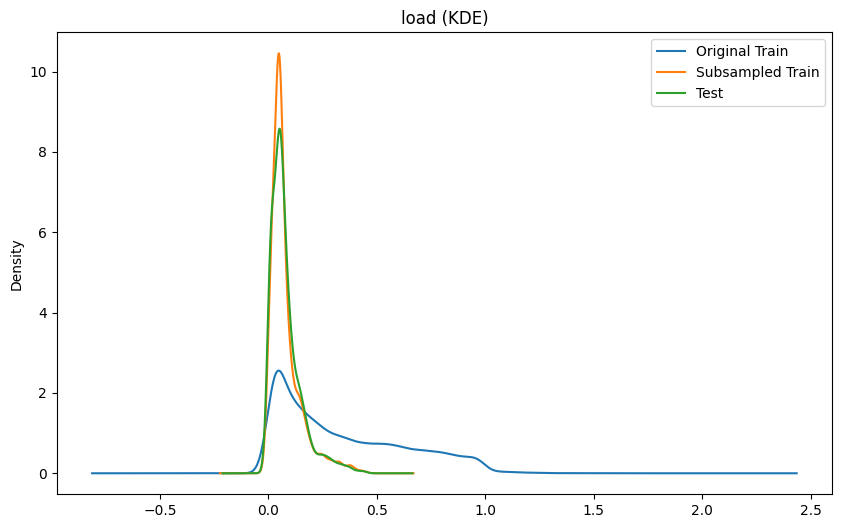

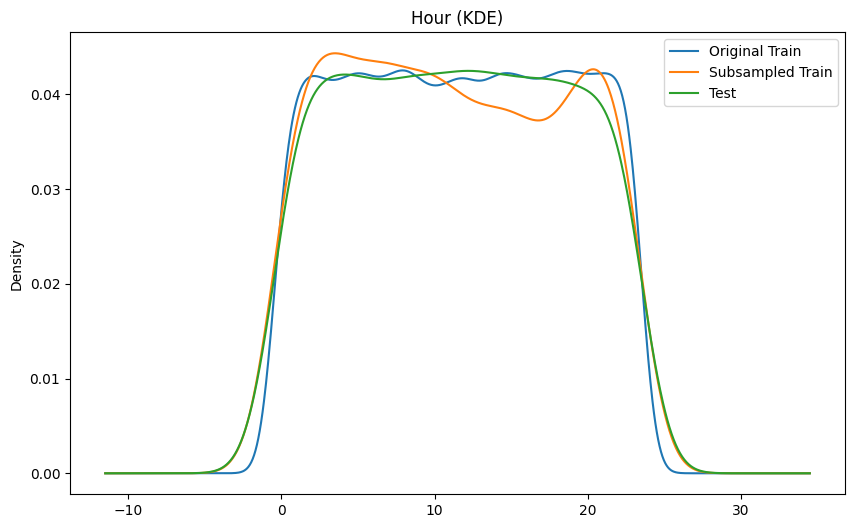

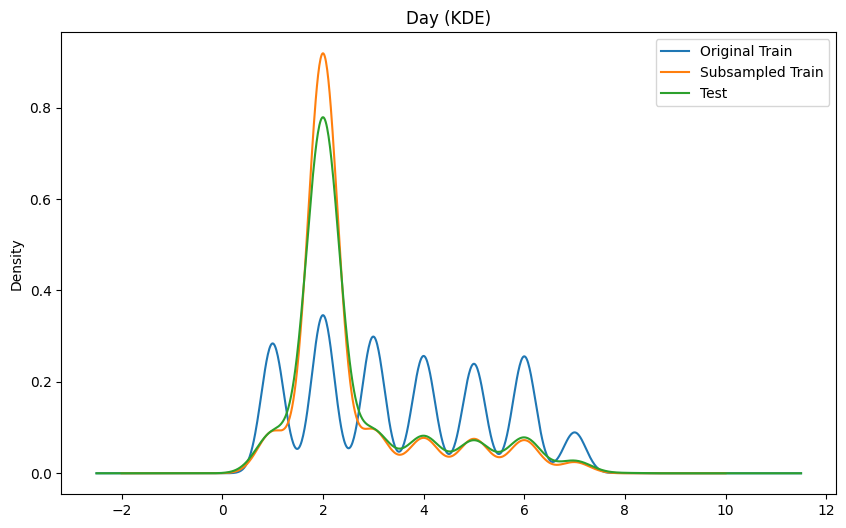

name: train_data_w5.csv
                    Time     BS     Energy    w      load  ESMode1  ESMode2  \
0    2023-01-02 00:00:00   B_10  30.343797 -1.0  0.058838      0.0      0.0   
1    2023-01-02 04:00:00   B_10  30.343797 -1.0  0.055178      0.0      0.0   
2    2023-01-02 05:00:00   B_10  30.044843 -1.0  0.055283      0.0      0.0   
3    2023-01-02 06:00:00   B_10  30.343797 -1.0  0.055349      0.0      0.0   
4    2023-01-02 07:00:00   B_10  30.642750 -1.0  0.056320      0.0      0.0   
...                  ...    ...        ...  ...       ...      ...      ...   
1995 2023-01-02 13:00:00  B_999  11.659193 -1.0  0.143462      0.0      0.0   
1996 2023-01-02 15:00:00  B_999  10.463378 -1.0  0.075962      0.0      0.0   
1997 2023-01-02 16:00:00  B_999  10.762332 -1.0  0.101981      0.0      0.0   
1998 2023-01-02 17:00:00  B_999  10.313901 -1.0  0.064673      0.0      0.0   
1999 2023-01-02 23:00:00  B_999   9.865471 -1.0  0.050346      0.0      0.0   

      ESMode3  ESMode4  ESM

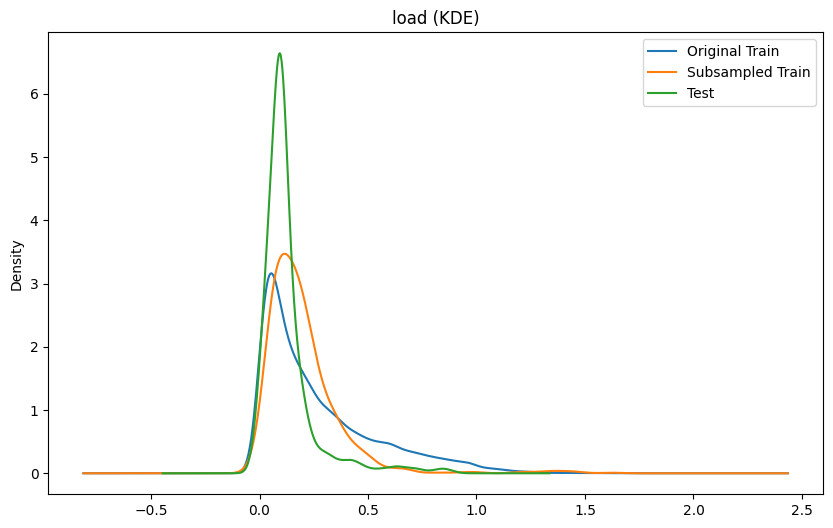

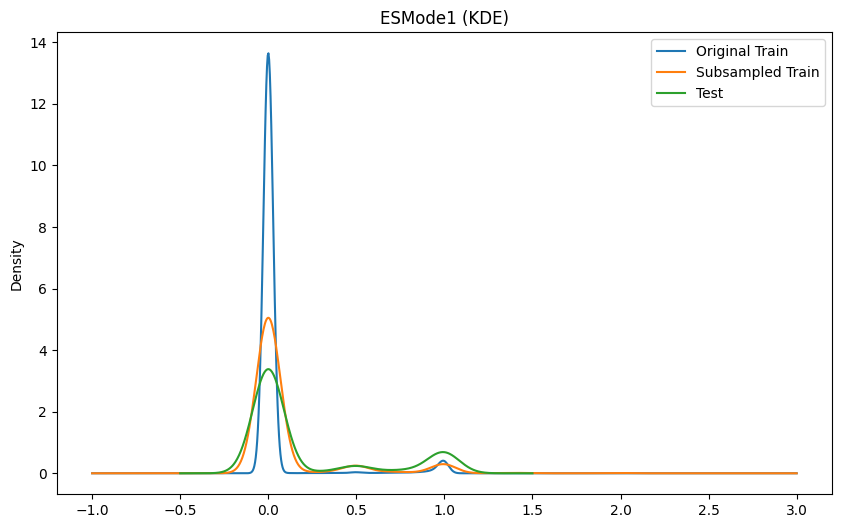

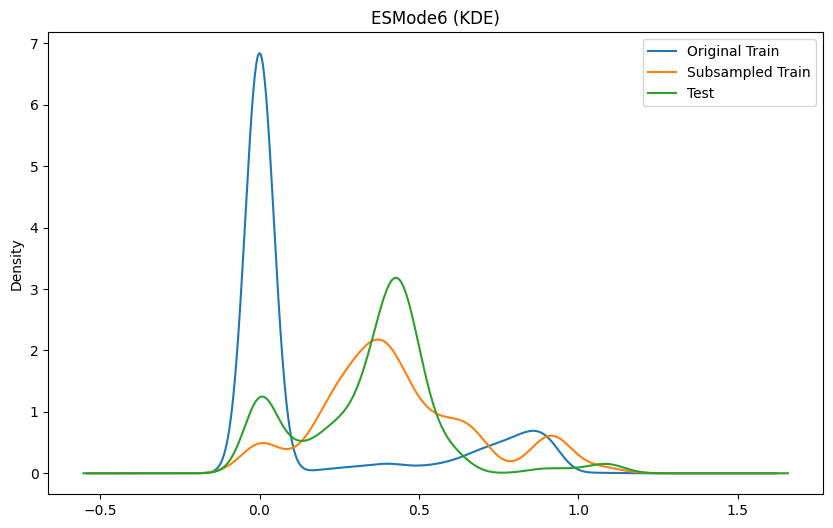

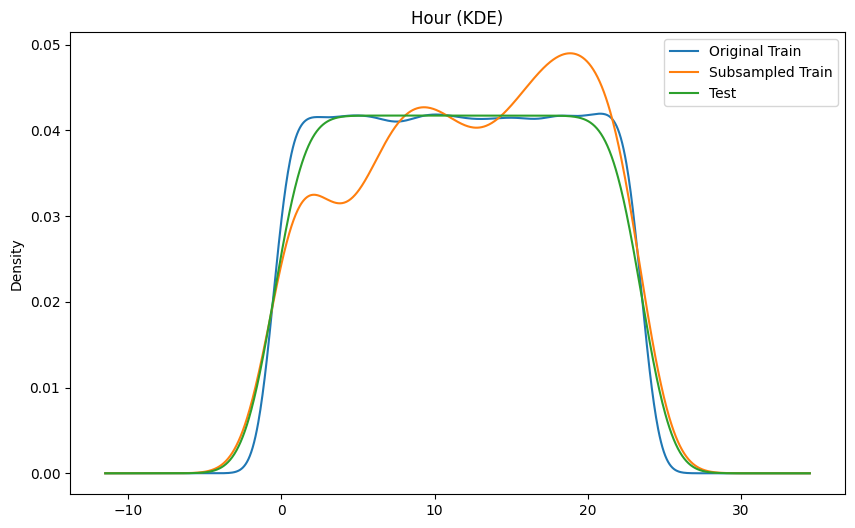

name: train_data_w10.csv
                    Time      BS     Energy    w      load  ESMode1  ESMode2  \
0    2023-01-02 00:00:00  B_1003  44.843049 -1.0  0.183992     0.00      0.0   
1    2023-01-02 01:00:00  B_1003  22.272048 -1.0  0.076481     0.95      0.0   
2    2023-01-02 06:00:00  B_1003  29.596413 -1.0  0.088068     0.50      0.0   
3    2023-01-02 07:00:00  B_1003  41.255605 -1.0  0.139361     0.00      0.0   
4    2023-01-02 08:00:00  B_1003  42.152466 -1.0  0.150767     0.00      0.0   
..                   ...     ...        ...  ...       ...      ...      ...   
995  2023-01-02 19:00:00   B_998  30.792227 -1.0  0.456288     0.00      0.0   
996  2023-01-02 20:00:00   B_998  31.838565 -1.0  0.447250     0.00      0.0   
997  2023-01-02 21:00:00   B_998  31.240658 -1.0  0.467385     0.00      0.0   
998  2023-01-02 22:00:00   B_998  29.446936 -1.0  0.410962     0.00      0.0   
999  2023-01-02 23:00:00   B_998  29.596413 -1.0  0.461365     0.00      0.0   

     ESMode3  

In [25]:
# Preprocessing and Feature Selection
usa_pickle_w1 = False
usa_pickle_w5 = False
usa_pickle_w10 = False

# Fold Group
fold_group_divide_w1=['RUType_cat', 'Energy_qcut', 'BS_cat']
fold_group_divide_w5=['load_qcut', 'Hour', 'Day']
fold_group_divide_w10=['load_qcut', 'ESMode1_qcut', 'ESMode6_qcut', 'Hour']

KFoldValidator._seed_everything(7)
# Special preprocessing for w1, w5, w10 models
X_train_w1, X_test_w1, y_train_w1, y_divide_w1 = get_features_for_w1(data_leakage=DATA_LEAKAGE, use_pickle=usa_pickle_w1, read_feature_file=False, fold_group_divide=fold_group_divide_w1)
X_train_w5, X_test_w5, y_train_w5, y_divide_w5 = get_features_for_w5(data_leakage=DATA_LEAKAGE, use_pickle=usa_pickle_w5, read_feature_file=False, mask=mask_w5, fold_group_divide=fold_group_divide_w5)
X_train_w10, X_test_w10, y_train_w10, y_divide_w10 = get_features_for_w10(data_leakage=DATA_LEAKAGE, use_pickle=usa_pickle_w5, read_feature_file=True, mask=mask_w10, fold_group_divide=fold_group_divide_w10)

In [26]:
# Training and Validation of Models
model = Model

# Optimized parameters
param_w1 = {
    'ridge': {
        'alpha': 1.0,
        'solver': 'auto',
    },
    'xgb': {
        'colsample_bytree': 0.8284861576665423,
        'gamma': 0.1295678854543193,
        'learning_rate': 0.13155971750935957,
        'max_depth': 7,
        'min_child_weight': 4,
        'n_estimators': 283,
        'subsample': 0.8908677567703485,
        'objective': 'reg:squarederror',
        'random_state': 7
    }
}

param_w5 = {
    'ridge': {'alpha': 0.01, 'solver': 'auto'},
    'xgb': {
          'objective': 'reg:squarederror',
          'random_state': 7
    }
}

param_w10 = {
    'ridge': {'alpha': 1, 'solver': 'auto'},
    'xgb': {
        'objective': 'reg:squarederror',
        'random_state': 7
    }
}

# Training and validation of w1, w5, and w10 models
val_w1, score_w1, preds_w1 = validate_and_predict(X_train_w1, y_train_w1, X_test_w1, y_divide_w1, model, usa_pickle_w1, 1, print_top_features=True, params=param_w1)
val_w5, score_w5, preds_w5 = validate_and_predict(X_train_w5, y_train_w5, X_test_w5, y_divide_w5, model, usa_pickle_w5, 5, print_top_features=True, params=param_w5)
val_w10, score_w10, preds_w10 = validate_and_predict(X_train_w10, y_train_w10, X_test_w10, y_divide_w10, model, usa_pickle_w10, 10, print_top_features=True, params=param_w10)

# Calculate the final score
final_score_wmape = KFoldValidator.calculate_final_score(score_w1[0], score_w5[0], score_w10[0])
final_score_mae = KFoldValidator.calculate_final_score(score_w1[1], score_w5[1], score_w10[1])

Fold score: 0.04, 1.18, Time elapsed: 129.76 seconds
Fold score: 0.04, 1.14, Time elapsed: 108.41 seconds
Fold score: 0.04, 1.14, Time elapsed: 110.87 seconds
Fold score: 0.04, 1.13, Time elapsed: 130.07 seconds
Fold score: 0.04, 1.16, Time elapsed: 104.00 seconds
Fold score: 0.04, 1.14, Time elapsed: 115.09 seconds
Fold score: 0.04, 1.16, Time elapsed: 107.81 seconds
Fold score: 0.04, 1.15, Time elapsed: 108.78 seconds
Fold score: 0.04, 1.15, Time elapsed: 110.26 seconds
Fold score: 0.04, 1.13, Time elapsed: 107.92 seconds
Scores per fold: [(0.04192601080541705, 1.1831781107487533), (0.04070143728807837, 1.1387541181858445), (0.04058140680687342, 1.1436163516620708), (0.040189901424185305, 1.1262380679824973), (0.04131941525900933, 1.160549415499918), (0.04046196860885557, 1.1419846806266276), (0.04120423155060716, 1.1619652780308702), (0.040883845013652526, 1.1522719091943687), (0.040989229174556004, 1.1519639632045033), (0.04009079635647552, 1.130088799911931)]
Mean score 0: 0.04083

In [27]:
# Generating the Submission
submission_df_final = generate_submission(mask_w1, mask_w5, mask_w10, preds_w1, preds_w5, preds_w10, PATH)

# Check and print null values information
print("Null values in each column:\n", submission_df_final.isnull().sum())
print(f"Number of rows with null values: {submission_df_final.isnull().any(axis=1).sum()}")

# Final data for submission
print(f"Modelo usado {model}")

print(f'WMAPE: {score_w1[0]:.5f}, {score_w5[0]:.5f}, {score_w10[0]:.5f}, {final_score_wmape:.5f}')
print(f'MAE: {score_w1[1]:.5f}, {score_w5[1]:.5f}, {score_w10[1]:.5f}, {final_score_mae:.5f}')

(23189, 5)
(1608, 5)
(1342, 5)
(26139, 5)
                  Time   BS     Energy    w  RUType_cat
5  2023-01-01 06:00:00  B_0  58.093099  1.0           0
10 2023-01-01 11:00:00  B_0  72.641768  1.0           0
11 2023-01-01 12:00:00  B_0  74.269215  1.0           0
12 2023-01-01 13:00:00  B_0  74.984455  1.0           0
22 2023-01-01 23:00:00  B_0  82.238874  1.0           0
30 2023-01-02 07:00:00  B_0  77.603263  1.0           0
42 2023-01-02 19:00:00  B_0  85.750443  1.0           0
73 2023-01-04 02:00:00  B_0  58.993329  1.0           0
75 2023-01-04 05:00:00  B_0  55.458223  1.0           0
79 2023-01-04 09:00:00  B_0  69.907355  1.0           0
                   Time      BS     Energy    w  RUType_cat
547 2023-01-02 00:00:00  B_1000  22.473791  5.0           0
548 2023-01-02 01:00:00  B_1000  23.615654  5.0           0
549 2023-01-02 02:00:00  B_1000  20.823552  5.0           0
550 2023-01-02 03:00:00  B_1000  18.740896  5.0           0
551 2023-01-02 04:00:00  B_1000  20.247482

<ipython-input-22-a578afe9bdaf>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['ID'] = submission_data['Time'].astype(str) + '_' + submission_data['BS']
